In [ ]:
from IPython.display import HTML

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# ML & Web scraping

### Data set used for ML part was created during Web Scrapping process.<br>
### For ML PART: code is commented out to keep data and results as they are shown in the report. Please load attached file created as a result of web scrapping.
### For Programming: please remove mardown and use web scrapping code.

In [2]:
# loading libraries
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from datetime import date
from datetime import datetime
from genderize import Genderize
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import base64

In [2]:
# # getting a User-Agent from https://httpbin.org/get
# headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36 Edg/105.0.1343.27", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}


In [3]:
# baseurl = 'https://www.property.ie/property-for-sale/dublin/price_0-950000/'

In [4]:
# productlinks = []
# for x in range(1,120):
#     r = requests.get(f'https://www.property.ie/property-for-sale/dublin/price_0-950000/p_{x}/')
#     soup = BeautifulSoup(r.content, 'html.parser')
#     productlist = soup.find_all('div', class_='search_result')

#     for item in productlist:
#         link = item.find('a', href=True)
#         if link:
#             productlinks.append(link['href'])

# print(productlinks)

['https://www.property.ie/property-for-sale/69-Kilbarron-Park-Kilmore-Kilmore-Dublin-5/14126974/', 'https://www.property.ie/property-for-sale/67-Park-Drive-Avenue-Castleknock-Castleknock-Dublin-15/16019228/', 'https://www.property.ie/property-for-sale/109-Clonliffe-Avenue-Dublin-3/15429344/', 'https://www.property.ie/property-for-sale/2a-Ballykea-Close-Ballykea-Skerries-Co-Dublin/16283509/', 'https://www.property.ie/property-for-sale/77-Kill-Avenue-Dun-Laoghaire-Co-Dublin/15951547/', 'https://www.property.ie/property-for-sale/13a-Hilltown-Lawn-Swords-Co-Dublin/15818059/', 'https://www.property.ie/property-for-sale/Tobersool-Lane-Balbriggan-Co-Dublin/14245866/', 'https://www.property.ie/property-for-sale/16-Achill-House-Custom-House-Square-IFSC-Dublin-1/16035433/', 'https://www.property.ie/property-for-sale/7-Brennanstown-Court-Brennanstown-Cabinteely-Dublin-18/15812248/', 'https://www.property.ie/property-for-sale/19-Abby-Well-Chapel-Road-Malahide-Co-Dublin/8594228/', 'https://www.prop

In [5]:
# House = []
# for link in productlinks:
#     r = requests.get(link, headers=headers)
#     soup = BeautifulSoup(r.content, 'lxml')
    
# # address
#     address = soup.find('h1', style = 'clear: left').text.strip()
    
    
# # pulling the data
#     na = soup.find("div", id="searchmoreinfo_summary")
#     name = na.get_text(strip=True)
    
    
# # extract price
#     price_match = re.search(r'€([\d,]+)',name)
#     if price_match:
#         price = price_match.group(1)
#     else:
#         price = None

# # pulling the number of bedrooms and bathrooms
#     bedrooms_match = re.search(r'(\d+) Bedrooms', name)
#     if bedrooms_match:
#         bedrooms = bedrooms_match.group(1)
#     else:
#         bedrooms = None

#     bathrooms_match = re.search(r'(\d+) Bathrooms', name)
#     if bathrooms_match:
#         bathrooms = bathrooms_match.group(1)
#     else:
#         bathrooms = None

# # extracting house type
#     house_type_match = re.search(r'(\w+ House)', name)
#     if house_type_match:
#         house_type = str(house_type_match.group(1))
#     else:
#         house_type = None
        
    
#     if house_type is not None:
#         house_type.startswith('000')
#         house_type = house_type.lstrip('0')
#     else:
#         house_type = None


# # creating a dictionary with the extracted information
#     info = {'Address':address,
#         'Price': price,
#         'Bedrooms': bedrooms,
#         'Bathrooms': bathrooms,
#         'House Type': house_type
# }
#     House.append(info)
#     print(info)

{'Address': '69 Kilbarron Park, Kilmore, Kilmore, Dublin 5', 'Price': '340,000', 'Bedrooms': '3', 'Bathrooms': None, 'House Type': 'Terraced House'}
{'Address': '67 Park Drive Avenue, Castleknock, Castleknock, Dublin 15', 'Price': '550,000', 'Bedrooms': '3', 'Bathrooms': '2', 'House Type': 'Terraced House'}
{'Address': '109 Clonliffe Avenue, Dublin 3', 'Price': '310,000', 'Bedrooms': '2', 'Bathrooms': None, 'House Type': 'Terraced House'}
{'Address': '2a Ballykea Close, Ballykea, Skerries, Co. Dublin', 'Price': '775,000', 'Bedrooms': '4', 'Bathrooms': '3', 'House Type': 'Detached House'}
{'Address': '77 Kill Avenue, Dun Laoghaire, Co. Dublin', 'Price': '795,000', 'Bedrooms': '4', 'Bathrooms': '5', 'House Type': 'Detached House'}
{'Address': '13a Hilltown Lawn, Swords, Co. Dublin', 'Price': '449,000', 'Bedrooms': '3', 'Bathrooms': '3', 'House Type': 'Detached House'}
{'Address': 'Tobersool Lane, Balbriggan, Co. Dublin', 'Price': '545,000', 'Bedrooms': '4', 'Bathrooms': '2', 'House Type'


KeyboardInterrupt



In [ ]:
# # saving data as dataFrame
# df_Dublin = pd.DataFrame(House)

In [ ]:
# saving file into and excel file
# df_Dublin.to_excel('C:\\ESTERA\\CA2\\data sets - IRL\\Dublin_Houses.xlsx', index=False)

In [3]:
# loading data set
df_Dublin = pd.read_excel('C:\\ESTERA\\CA2\\data sets - IRL\\Dublin_Houses.xlsx')

df_Dublin.head()

Address    Price  Bedrooms  \
0  67 Park Drive Avenue, Castleknock, Castleknock...  550,000       3.0   
1                     109 Clonliffe Avenue, Dublin 3  310,000       2.0   
2  2a Ballykea Close, Ballykea, Skerries, Co. Dublin  775,000       4.0   
3          77 Kill Avenue, Dun Laoghaire, Co. Dublin  795,000       4.0   
4              13a Hilltown Lawn, Swords, Co. Dublin  449,000       3.0   

   Bathrooms      House Type  
0        2.0  Terraced House  
1        NaN  Terraced House  
2        3.0  Detached House  
3        5.0  Detached House  
4        3.0  Detached House

In [4]:
df_Dublin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     1101 non-null   object 
 1   Price       1101 non-null   object 
 2   Bedrooms    975 non-null    float64
 3   Bathrooms   619 non-null    float64
 4   House Type  693 non-null    object 
dtypes: float64(2), object(3)
memory usage: 43.1+ KB


In [5]:
# splitting the address data 
split_address = df_Dublin['Address'].str.rsplit(', ', n=2, expand=True)
df_Dublin[['District', 'Area', 'Street']] = split_address.iloc[:, ::-1]
df_Dublin.head()

Address    Price  Bedrooms  \
0  67 Park Drive Avenue, Castleknock, Castleknock...  550,000       3.0   
1                     109 Clonliffe Avenue, Dublin 3  310,000       2.0   
2  2a Ballykea Close, Ballykea, Skerries, Co. Dublin  775,000       4.0   
3          77 Kill Avenue, Dun Laoghaire, Co. Dublin  795,000       4.0   
4              13a Hilltown Lawn, Swords, Co. Dublin  449,000       3.0   

   Bathrooms      House Type    District           Area  \
0        2.0  Terraced House   Dublin 15    Castleknock   
1        NaN  Terraced House        None       Dublin 3   
2        3.0  Detached House  Co. Dublin       Skerries   
3        5.0  Detached House  Co. Dublin  Dun Laoghaire   
4        3.0  Detached House  Co. Dublin         Swords   

                              Street  
0  67 Park Drive Avenue, Castleknock  
1               109 Clonliffe Avenue  
2        2a Ballykea Close, Ballykea  
3                     77 Kill Avenue  
4                  13a Hilltown Lawn

In [6]:
# moving all values from Area column to District column if there is word 'Dublin' in it
df_Dublin.loc[df_Dublin['Area'].str.contains(r'\bDublin\b', na=False), 'District'] = df_Dublin['Area']
df_Dublin['Area'] = df_Dublin['Area'].str.replace(r'\bDublin\b', '')
df_Dublin.head()

C:\Users\ester\AppData\Local\Temp\ipykernel_19820\2206455085.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_Dublin['Area'] = df_Dublin['Area'].str.replace(r'\bDublin\b', '')


Address    Price  Bedrooms  \
0  67 Park Drive Avenue, Castleknock, Castleknock...  550,000       3.0   
1                     109 Clonliffe Avenue, Dublin 3  310,000       2.0   
2  2a Ballykea Close, Ballykea, Skerries, Co. Dublin  775,000       4.0   
3          77 Kill Avenue, Dun Laoghaire, Co. Dublin  795,000       4.0   
4              13a Hilltown Lawn, Swords, Co. Dublin  449,000       3.0   

   Bathrooms      House Type    District           Area  \
0        2.0  Terraced House   Dublin 15    Castleknock   
1        NaN  Terraced House    Dublin 3              3   
2        3.0  Detached House  Co. Dublin       Skerries   
3        5.0  Detached House  Co. Dublin  Dun Laoghaire   
4        3.0  Detached House  Co. Dublin         Swords   

                              Street  
0  67 Park Drive Avenue, Castleknock  
1               109 Clonliffe Avenue  
2        2a Ballykea Close, Ballykea  
3                     77 Kill Avenue  
4                  13a Hilltown Lawn

In [7]:
# dropping unnecessary columns
df_Dublin.drop(columns=['Address', 'Area', 'Street'], inplace=True)

In [8]:
# dropping all none values
df_Dublin = df_Dublin.dropna()

In [9]:
# removing "," sign
df_Dublin['Price'] = df_Dublin['Price'].str.replace(',', '')

In [10]:
# checking column types
df_Dublin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       430 non-null    object 
 1   Bedrooms    430 non-null    float64
 2   Bathrooms   430 non-null    float64
 3   House Type  430 non-null    object 
 4   District    430 non-null    object 
dtypes: float64(2), object(3)
memory usage: 20.2+ KB


In [11]:
# converting object columns to int
columns_to_convert = ['Price', 'Bedrooms', 'Bathrooms']
df_Dublin.loc[:, columns_to_convert] = df_Dublin.loc[:, columns_to_convert].astype(int)

C:\Users\ester\AppData\Local\Temp\ipykernel_19820\209825706.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_Dublin.loc[:, columns_to_convert] = df_Dublin.loc[:, columns_to_convert].astype(int)


In [12]:
# checking how many unique types of house
df_Dublin['House Type'].unique()

array(['Terraced House', 'Detached House', 'Terrace House',
       '950Terraced House', '950Detached House'], dtype=object)

In [13]:
# correcting errors withing 'House Type' column
Terraced = ['Terraced House','950Terraced House']
df_Dublin['House Type'] = df_Dublin['House Type'].replace(Terraced, 'Terrace House')
df_Dublin['House Type'] = df_Dublin['House Type'].replace('950Detached House', 'Detached House')
df_Dublin['House Type'].unique()

array(['Terrace House', 'Detached House'], dtype=object)

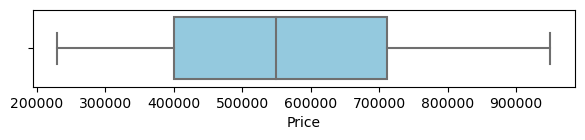

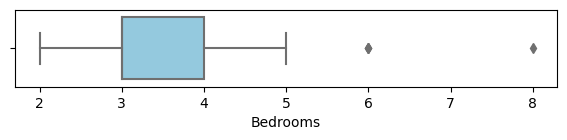

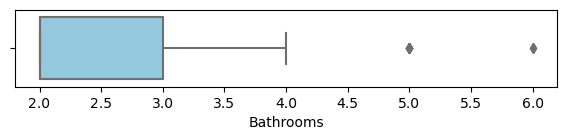

In [14]:
# creating boxplots to visualise data

# selecting only non-object columns
numeric_columns = df_Dublin.select_dtypes(exclude='object').columns


for column in df_Dublin[numeric_columns]:
        plt.figure(figsize=(7,1))
        sns.boxplot(data=df_Dublin[numeric_columns], x=column, color='skyblue')


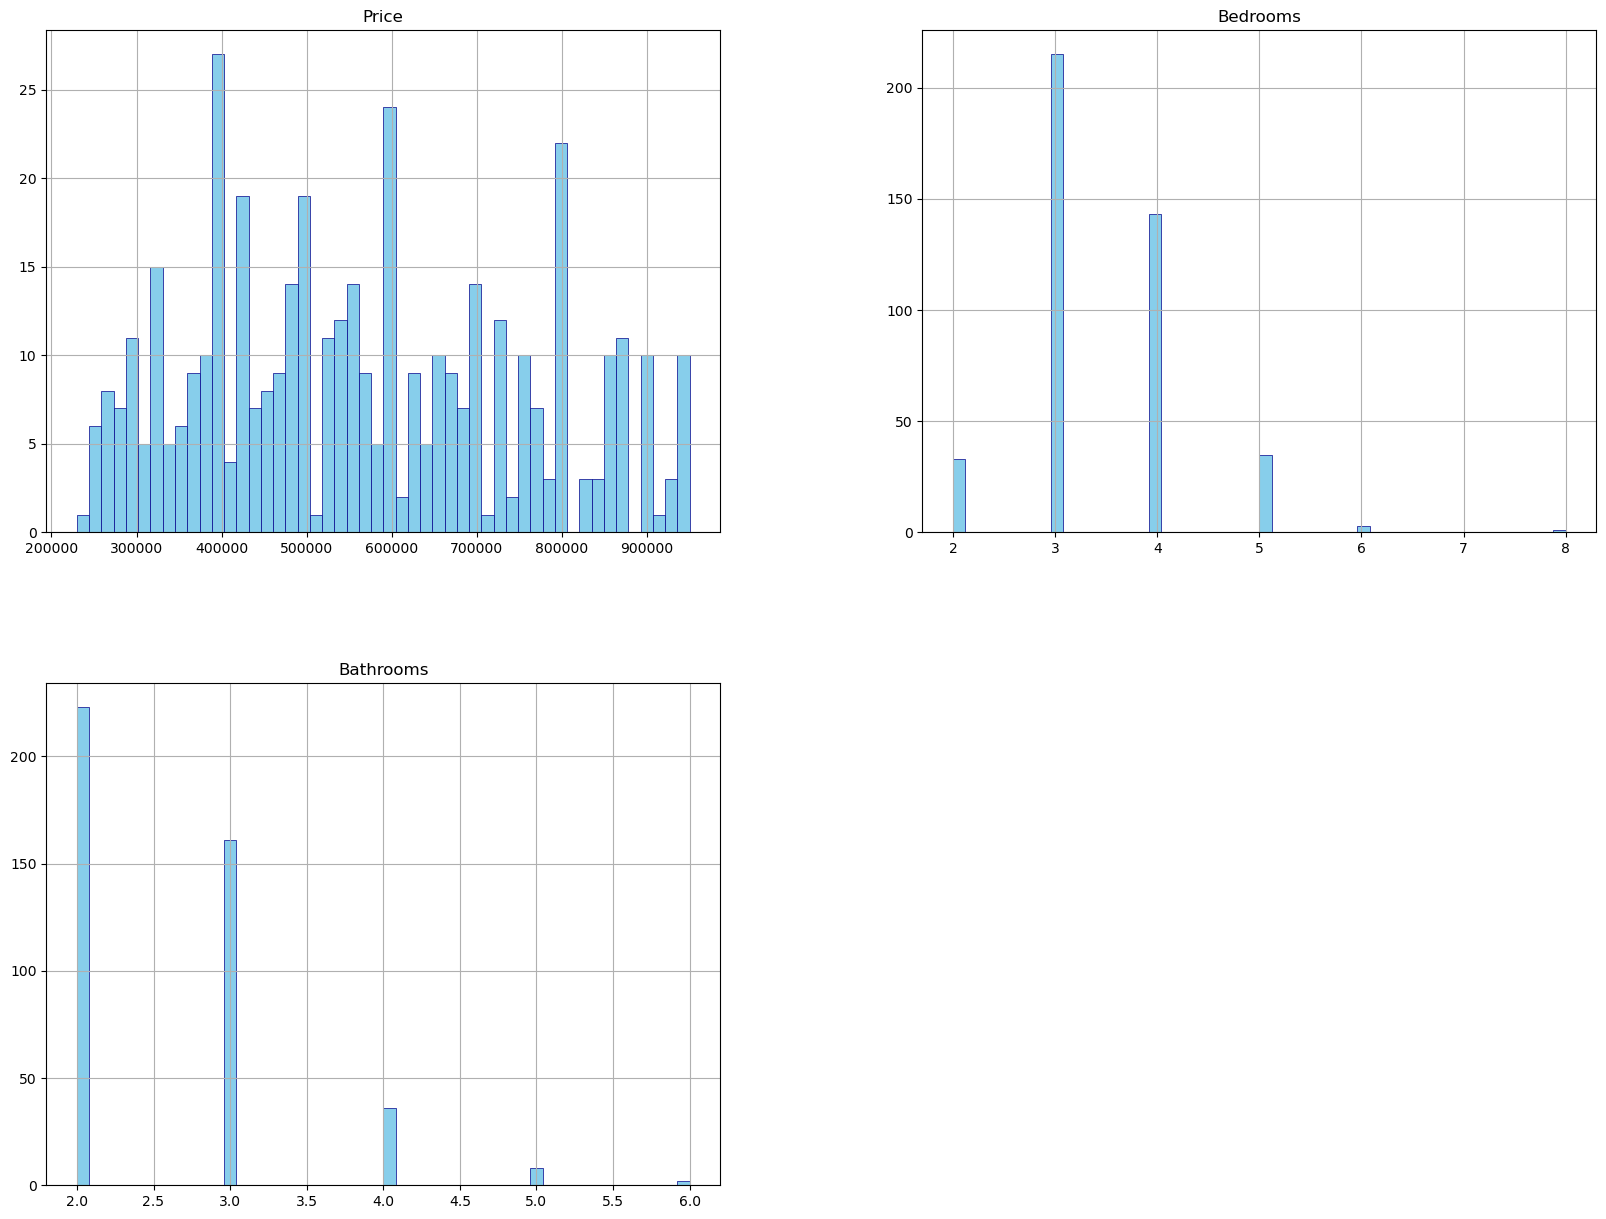

In [15]:
# creating a histograms
df_Dublin.hist(bins=50, figsize=(20,15), color='skyblue',edgecolor='darkblue', linewidth=0.5)
plt.show()

In [16]:
# creating the box plots using Plotly Express
fig = px.box(df_Dublin, x='House Type', y='Price', title='House Type Price Difference')
fig.show()


## 2. Binary Classification
### 2.1. Preparing data

In [17]:
# getting dummies for 'House Type' column
df_Dublin = pd.get_dummies(df_Dublin, columns=['House Type'])
df_Dublin.head()

Price  Bedrooms  Bathrooms    District  House Type_Detached House  \
0  550000         3          2   Dublin 15                          0   
2  775000         4          3  Co. Dublin                          1   
3  795000         4          5  Co. Dublin                          1   
4  449000         3          3  Co. Dublin                          1   
5  545000         4          2  Co. Dublin                          1   

   House Type_Terrace House  
0                         1  
2                         0  
3                         0  
4                         0  
5                         0

In [18]:
# modifing 'District' column
df_Dublin['District'] = df_Dublin['District'].apply(lambda x: 'County' if 'Co.' in x else 'Dublin' if 'Dublin' in x else x)
df_Dublin.head()

Price  Bedrooms  Bathrooms District  House Type_Detached House  \
0  550000         3          2   Dublin                          0   
2  775000         4          3   County                          1   
3  795000         4          5   County                          1   
4  449000         3          3   County                          1   
5  545000         4          2   County                          1   

   House Type_Terrace House  
0                         1  
2                         0  
3                         0  
4                         0  
5                         0

In [19]:
df_Dublin['Price'].describe()

count       430.000000
mean     564768.476744
std      189067.267221
min      230000.000000
25%      400000.000000
50%      549975.000000
75%      711000.000000
max      950000.000000
Name: Price, dtype: float64

In [20]:
# creating a price rangne groups
start_value = 230000
end_value = 950000
num_groups = 5  # Number of groups to create

# calculating the step size to evenly divide the range
step_size = (end_value - start_value) / num_groups

# defining the range labels for each group
range_labels = [f"{start_value + i * step_size}-{start_value + (i + 1) * step_size}" for i in range(num_groups)]

# creating the groups
groups = pd.cut(df_Dublin['Price'], bins=num_groups, labels=False)

# creating separate columns for each group using get_dummies and name the columns
group_columns = pd.get_dummies(groups, prefix='Price_Group')
group_columns.columns = ['Price_Group_' + range_labels[i] for i in range(num_groups)]

# concatenating the group columns with the original DataFrame
df_Dublin = pd.concat([df_Dublin, group_columns], axis=1)

df_Dublin.head()

Price  Bedrooms  Bathrooms District  House Type_Detached House  \
0  550000         3          2   Dublin                          0   
2  775000         4          3   County                          1   
3  795000         4          5   County                          1   
4  449000         3          3   County                          1   
5  545000         4          2   County                          1   

   House Type_Terrace House  Price_Group_230000.0-374000.0  \
0                         1                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   
5                         0                              0   

   Price_Group_374000.0-518000.0  Price_Group_518000.0-662000.0  \
0                              0                              1   
2                              0                              0   
3                              0                              0   
4                              1                              0   
5                              0                              1   

   Price_Group_662000.0-806000.0  Price_Group_806000.0-950000.0  
0                              0                              0  
2                              1                              0  
3                              1                              0  
4                              0                              0  
5                              0                              0

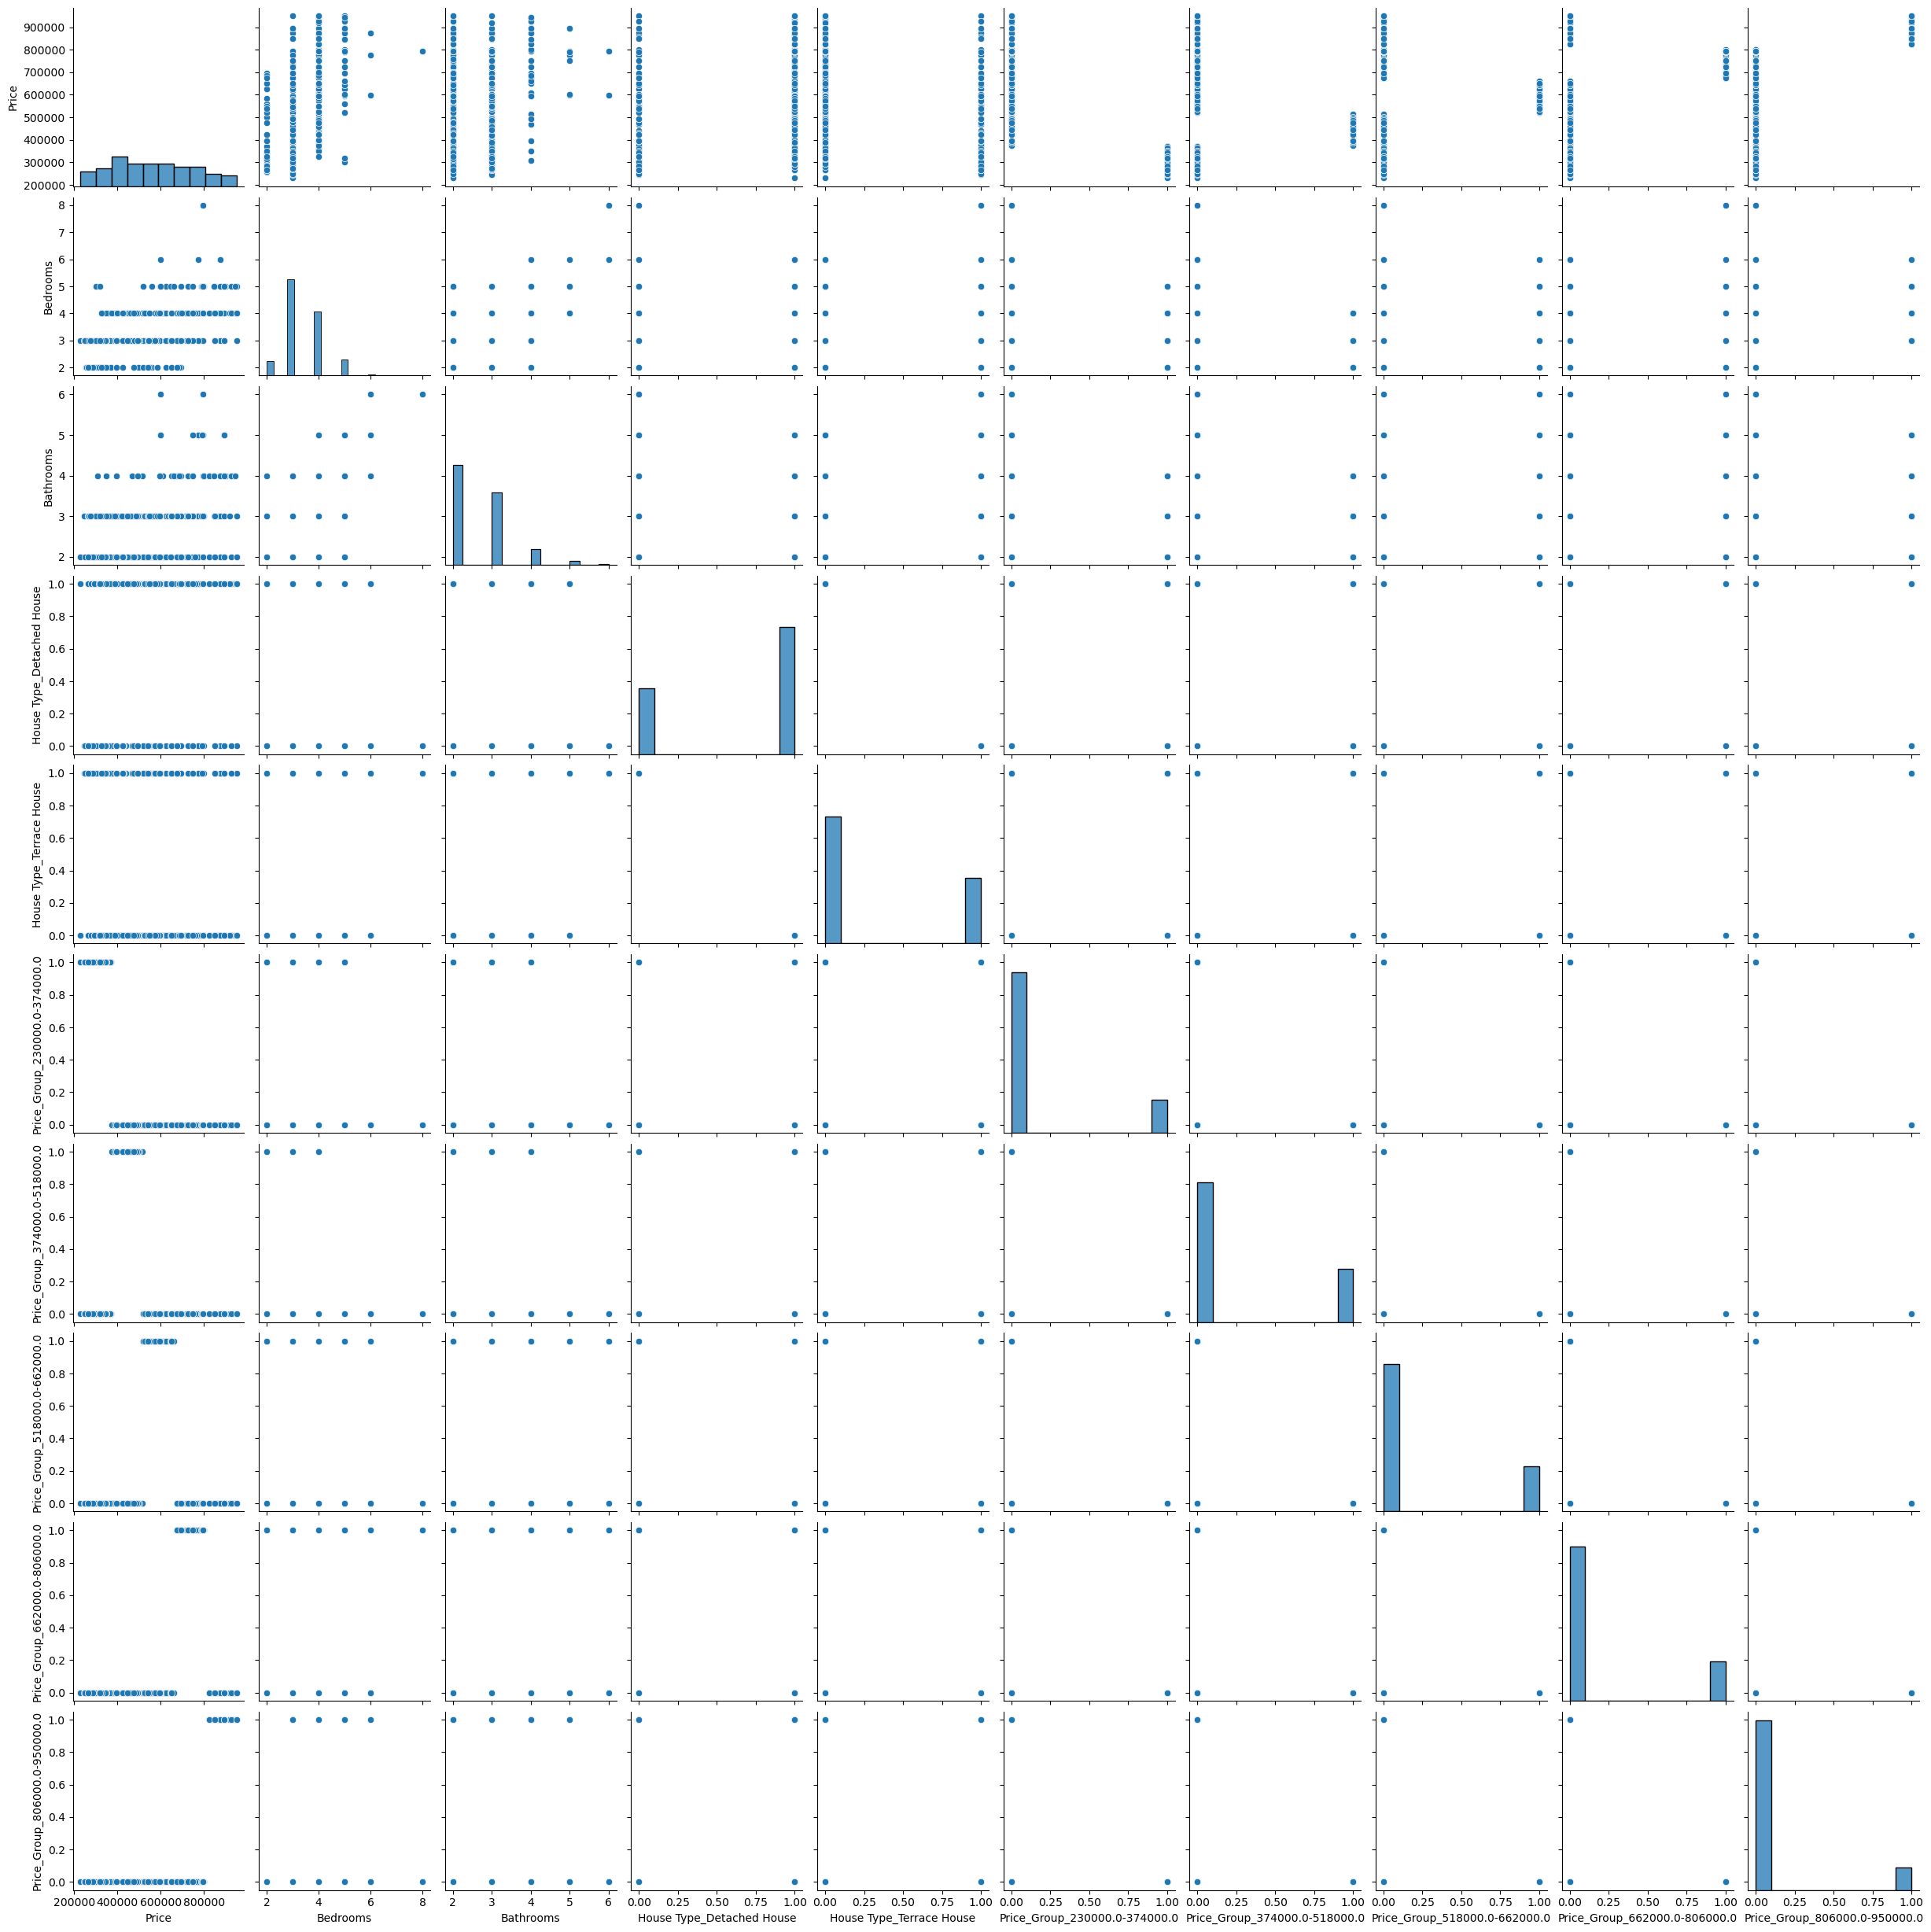

In [21]:
# creating a pair plot to see type of relationships between variables

# selecting only numerical columns
numerical_cols = df_Dublin.select_dtypes(include='number')

sns.pairplot(numerical_cols)
plt.show()

In [22]:
df_Dublin.drop('Price', axis=1, inplace=True)

In [23]:
df_Dublin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Bedrooms                       430 non-null    int32 
 1   Bathrooms                      430 non-null    int32 
 2   District                       430 non-null    object
 3   House Type_Detached House      430 non-null    uint8 
 4   House Type_Terrace House       430 non-null    uint8 
 5   Price_Group_230000.0-374000.0  430 non-null    uint8 
 6   Price_Group_374000.0-518000.0  430 non-null    uint8 
 7   Price_Group_518000.0-662000.0  430 non-null    uint8 
 8   Price_Group_662000.0-806000.0  430 non-null    uint8 
 9   Price_Group_806000.0-950000.0  430 non-null    uint8 
dtypes: int32(2), object(1), uint8(7)
memory usage: 29.2+ KB


C:\Users\ester\AppData\Local\Temp\ipykernel_19820\3995137497.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



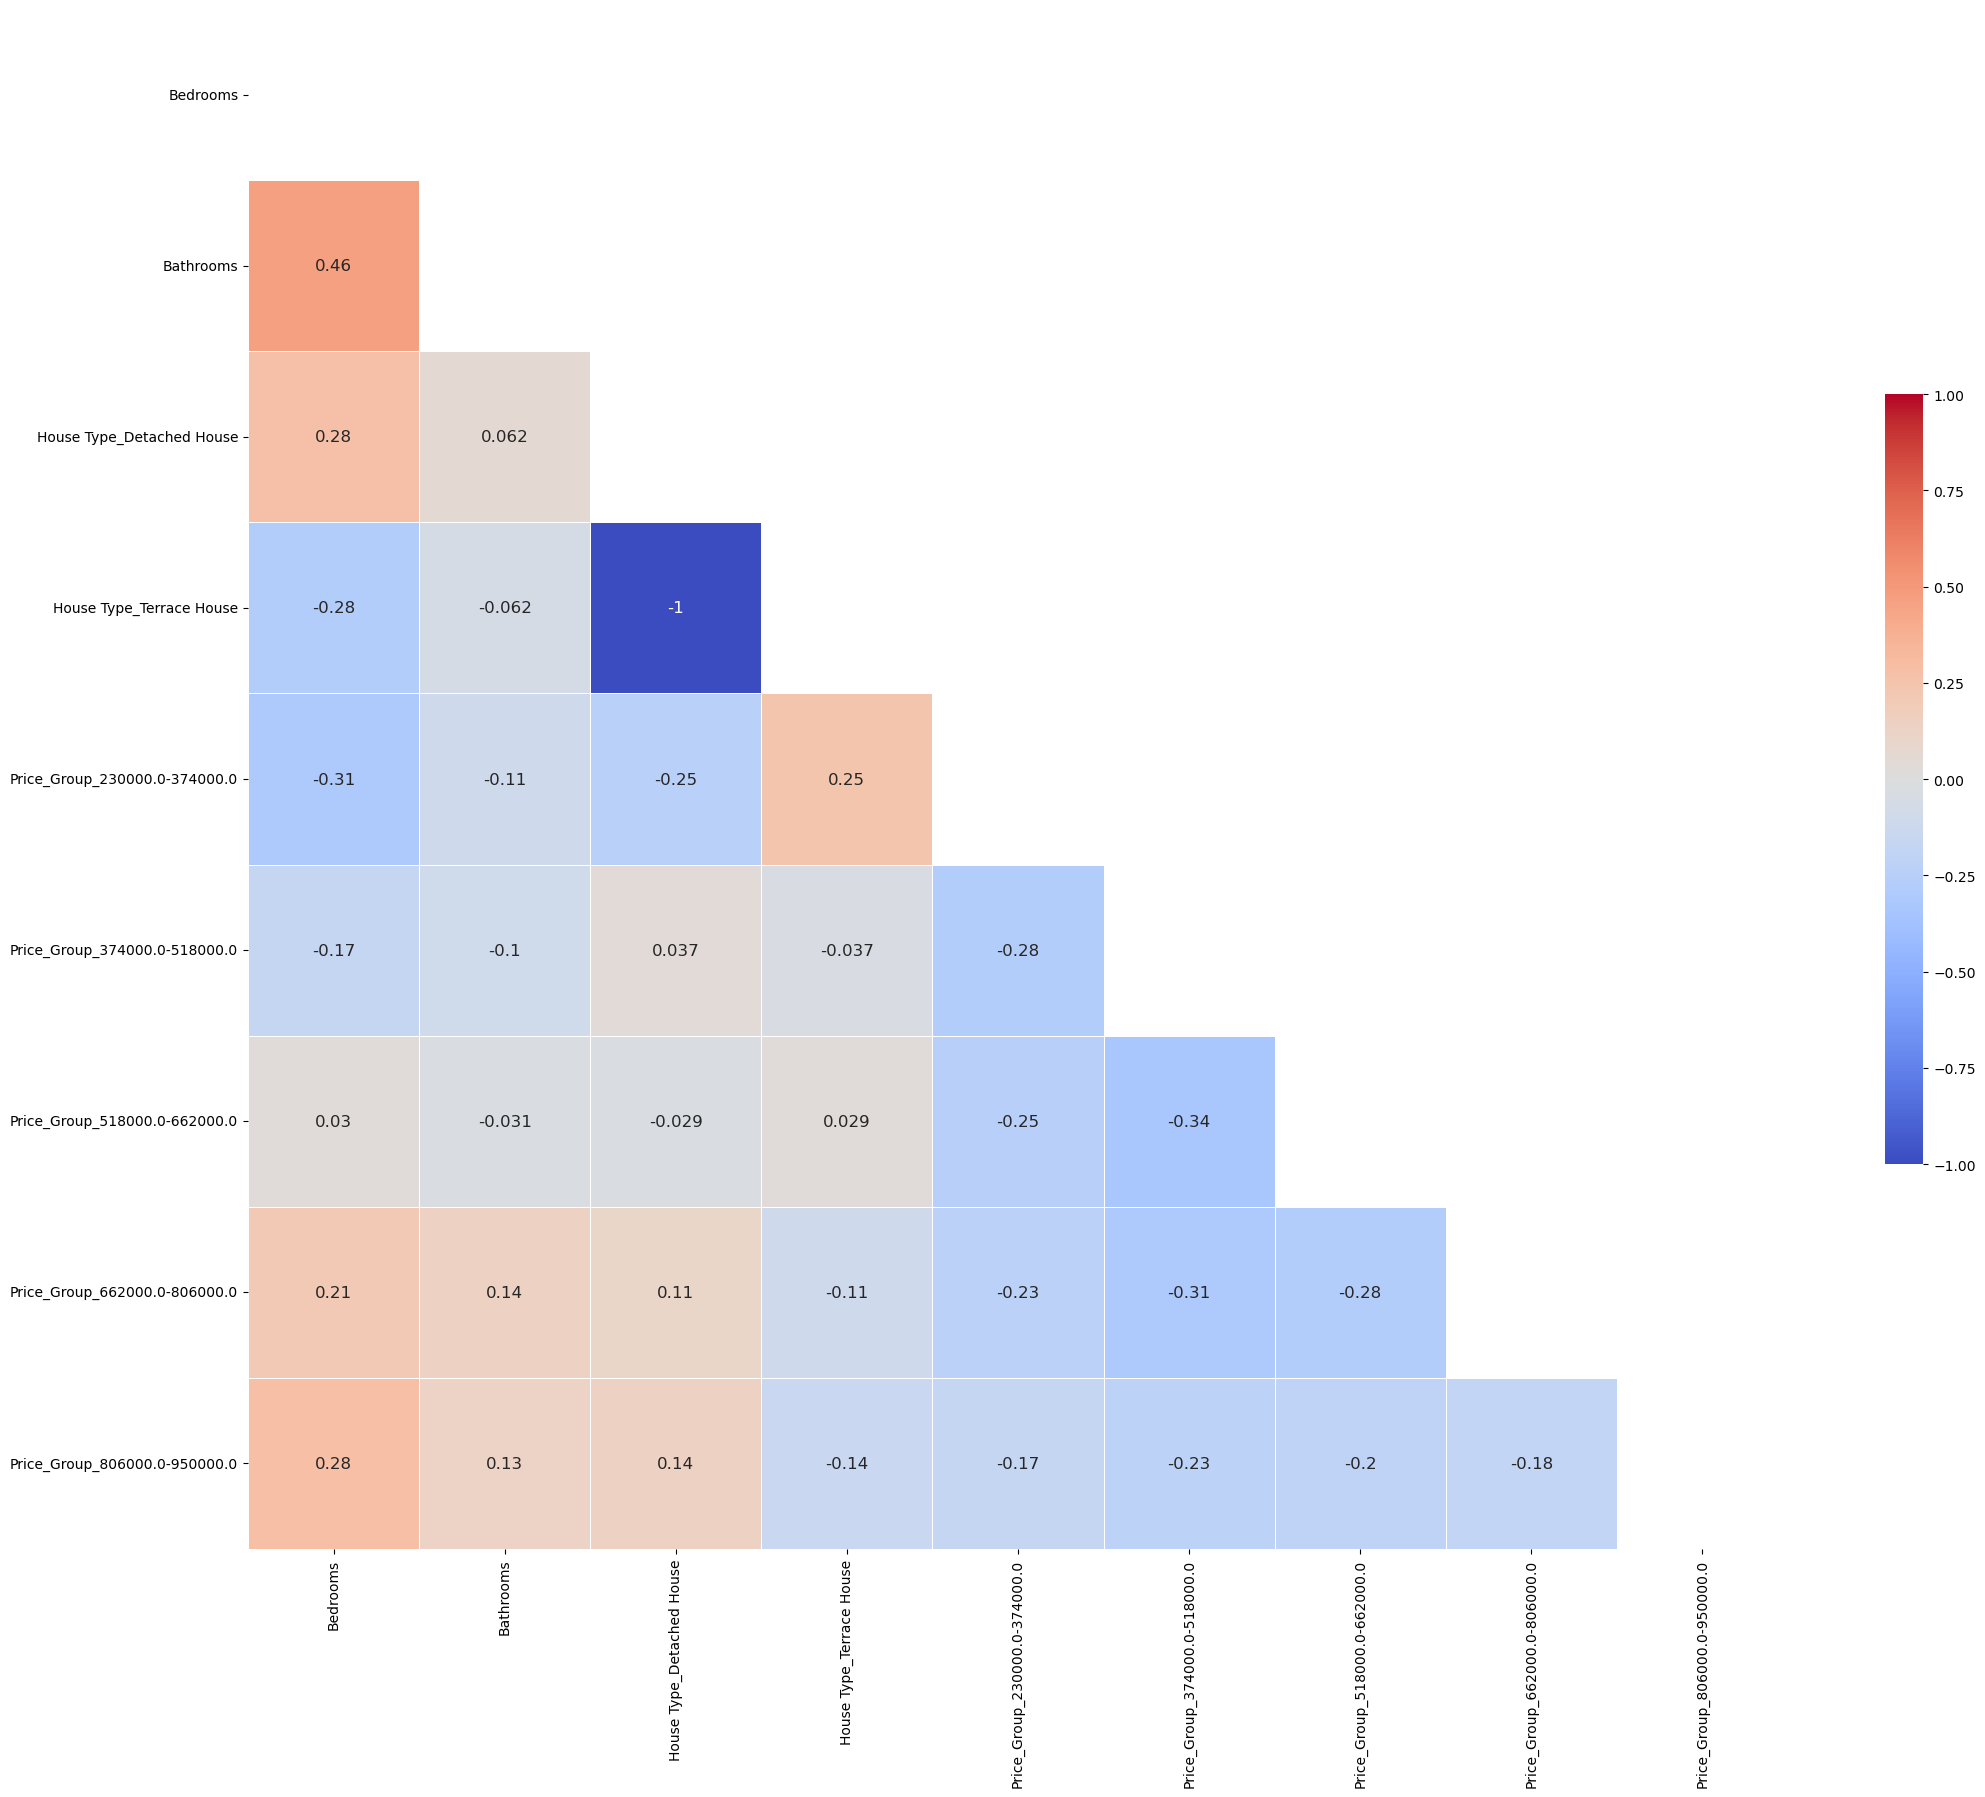

In [24]:
# checking correlation between variables

# plotting heatmap
corrmat = df_Dublin.corr()

# setting mask for upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# setting hot-cold colour scheme
# cmap = sns.diverging_palette(240, 15, as_cmap=True)
cmap = 'coolwarm'

# plotting the graph
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corrmat, square = True, mask=mask, cmap=cmap,
            vmax=1, vmin=-1, center=0,
            annot = True, annot_kws = {'size': 12},
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [25]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [26]:
# separating features and target variable
X = df_Dublin.drop('District', axis=1)
y = df_Dublin['District']

In [27]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
df_Dublin.head()

Bedrooms  Bathrooms District  House Type_Detached House  \
0         3          2   Dublin                          0   
2         4          3   County                          1   
3         4          5   County                          1   
4         3          3   County                          1   
5         4          2   County                          1   

   House Type_Terrace House  Price_Group_230000.0-374000.0  \
0                         1                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   
5                         0                              0   

   Price_Group_374000.0-518000.0  Price_Group_518000.0-662000.0  \
0                              0                              1   
2                              0                              0   
3                              0                              0   
4                              1                              0   
5                              0                              1   

   Price_Group_662000.0-806000.0  Price_Group_806000.0-950000.0  
0                              0                              0  
2                              1                              0  
3                              1                              0  
4                              0                              0  
5                              0                              0

## 2.3. KNN
#### a) Standard code

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# creating a KNN classifier with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# training the model on the training set
knn.fit(X_train, y_train)

# predicting the target variable for the test set
y_pred = knn.predict(X_test)

# calculating the model results
accuracy_KNN = accuracy_score(y_test, y_pred)
precision_KNN = precision_score(y_test, y_pred, pos_label='Dublin')
recall_KNN = recall_score(y_test, y_pred, pos_label='Dublin')
f1_KNN = f1_score(y_test, y_pred, pos_label='Dublin')

# calculating confusion matrix
confusion_mat_KNN = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy_KNN}")
print(f"Precision: {precision_KNN}")
print(f"Recall: {recall_KNN}")
print(f"F1 Score: {f1_KNN}")
print("Confusion Matrix:")
print(confusion_mat_KNN)

Evaluation Metrics:
Accuracy: 0.6511627906976745
Precision: 0.746031746031746
Recall: 0.7704918032786885
F1 Score: 0.7580645161290323
Confusion Matrix:
[[ 9 16]
 [14 47]]


In [30]:
# checking size of each class
from collections import Counter

# summarizing class distribution
print("Before oversampling: ",Counter(y_train))

Before oversampling:  Counter({'Dublin': 225, 'County': 119})


#### b) Addressing class imbalance - SMOTE

In [31]:
# oversampling using SMOTE
from imblearn.over_sampling import SMOTE

SMOTE = SMOTE()

In [32]:
# creating a KNN classifier with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# appling the transformation
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# training the model on the training set
knn.fit(X_train_SMOTE, y_train_SMOTE)

# predicting the target variable for the test set
y_pred = knn.predict(X_test)

# evaluating the model
accuracy_KNN2 = accuracy_score(y_test, y_pred)
precision_KNN2 = precision_score(y_test, y_pred, pos_label='Dublin')
recall_KNN2 = recall_score(y_test, y_pred, pos_label='Dublin')
f1_KNN2 = f1_score(y_test, y_pred, pos_label='Dublin')

# calculating the confusion matrix
confusion_mat_KNN2 = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy_KNN2}")
print(f"Precision: {precision_KNN2}")
print(f"Recall: {recall_KNN2}")
print(f"F1 Score: {f1_KNN2}")
print("Confusion Matrix:")
print(confusion_mat_KNN2)

Evaluation Metrics:
Accuracy: 0.6046511627906976
Precision: 0.7368421052631579
Recall: 0.6885245901639344
F1 Score: 0.7118644067796609
Confusion Matrix:
[[10 15]
 [19 42]]


In [33]:
# summarizing class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({'County': 225, 'Dublin': 225})


#### c) Addressing class imbalance - BorderlineSMOTE

In [34]:
from imblearn.over_sampling import BorderlineSMOTE

# Aapling Borderline-SMOTE to oversample the minority class
Bsmote = BorderlineSMOTE()
X_train_Bsmote, y_train_Bsmote = Bsmote.fit_resample(X_train, y_train)

# creating a new KNN model with the optimal value of K
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# training the model on the oversampled training set
knn.fit(X_train_Bsmote, y_train_Bsmote)

# pedicting the target variable for the test set
y_pred = knn.predict(X_test)

# calculating the model results
accuracy_KNN3 = accuracy_score(y_test, y_pred)
precision_KNN3 = precision_score(y_test, y_pred, pos_label='Dublin')
recall_KNN3 = recall_score(y_test, y_pred, pos_label='Dublin')
f1_KNN3 = f1_score(y_test, y_pred, pos_label='Dublin')

# calculating the confusion matrix
confusion_mat_KNN3 = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy_KNN3}")
print(f"Precision: {precision_KNN3}")
print(f"Recall: {recall_KNN3}")
print(f"F1 Score: {f1_KNN3}")
print("Confusion Matrix:")
print(confusion_mat_KNN3)

Evaluation Metrics:
Accuracy: 0.5930232558139535
Precision: 0.7241379310344828
Recall: 0.6885245901639344
F1 Score: 0.7058823529411765
Confusion Matrix:
[[ 9 16]
 [19 42]]


#### d) Addressing class imbalance - SMOTE-ENN

In [35]:
from imblearn.combine import SMOTEENN

# appling SMOTE-ENN to oversample and undersample the data
smote_enn = SMOTEENN()
X_train_enn, y_train_enn = smote_enn.fit_resample(X_train, y_train)

# creating a new KNN model with the optimal value of K
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# training the model on the resampled training set
knn.fit(X_train_enn, y_train_enn)

# predicting the target variable for the test set
y_pred = knn.predict(X_test)

# calculating the model results
accuracy_KNN4 = accuracy_score(y_test, y_pred)
precision_KNN4 = precision_score(y_test, y_pred, pos_label='Dublin')
recall_KNN4 = recall_score(y_test, y_pred, pos_label='Dublin')
f1_KNN4 = f1_score(y_test, y_pred, pos_label='Dublin')

# calculating the confusion matrix
confusion_mat_KNN4 = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy_KNN4}")
print(f"Precision: {precision_KNN4}")
print(f"Recall: {recall_KNN4}")
print(f"F1 Score: {f1_KNN4}")
print("Confusion Matrix:")
print(confusion_mat_KNN4)

Evaluation Metrics:
Accuracy: 0.5930232558139535
Precision: 0.7096774193548387
Recall: 0.7213114754098361
F1 Score: 0.7154471544715446
Confusion Matrix:
[[ 7 18]
 [17 44]]


#### e) selecting best parameters

In [36]:
#defining the parameter grid
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'weights': ['uniform', 'distance']}

# creating a KNN classifier
knn = KNeighborsClassifier()

In [37]:
# performming grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# creating a new KNN classifier with the best hyperparameters
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])

# training the model on the training set
knn_best.fit(X_train, y_train)

# predicting the target variable for the test set
y_pred = knn_best.predict(X_test)

# calculating the model results
accuracy_KNN_hyp = accuracy_score(y_test, y_pred)
precision_KNN_hyp = precision_score(y_test, y_pred, pos_label='Dublin')
recall_KNN_hyp = recall_score(y_test, y_pred, pos_label='Dublin')
f1_KNN_hyp = f1_score(y_test, y_pred, pos_label='Dublin')

# Calculating confusion matrix
confusion_mat_KNN_hyp = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_KNN_hyp}")
print(f"Precision: {precision_KNN_hyp}")
print(f"Recall: {recall_KNN_hyp}")
print(f"F1 Score: {f1_KNN_hyp}")
print("Confusion Matrix:")
print(confusion_mat_KNN_hyp)

Best Hyperparameters:
{'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.627906976744186
Precision: 0.7301587301587301
Recall: 0.7540983606557377
F1 Score: 0.7419354838709677
Confusion Matrix:
[[ 8 17]
 [15 46]]


In [38]:
# performming grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

#getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# creating a new KNN classifier with the best hyperparameters
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])

#training the model on the training set
knn_best.fit(X_train_SMOTE, y_train_SMOTE)

# predicting the target variable for the test set
y_pred = knn_best.predict(X_test)

# calculating the model results
accuracy_KNN_hyp2 = accuracy_score(y_test, y_pred)
precision_KNN_hyp2 = precision_score(y_test, y_pred, pos_label='Dublin')
recall_KNN_hyp2 = recall_score(y_test, y_pred, pos_label='Dublin')
f1_KNN_hyp2 = f1_score(y_test, y_pred, pos_label='Dublin')

# calculating confusion matrix
confusion_mat_KNN_hyp2 = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_KNN_hyp2}")
print(f"Precision: {precision_KNN_hyp2}")
print(f"Recall: {recall_KNN_hyp2}")
print(f"F1 Score: {f1_KNN_hyp2}")
print("Confusion Matrix:")
print(confusion_mat_KNN_hyp2)

Best Hyperparameters:
{'n_neighbors': 12, 'weights': 'uniform'}
Accuracy: 0.6046511627906976
Precision: 0.7454545454545455
Recall: 0.6721311475409836
F1 Score: 0.7068965517241379
Confusion Matrix:
[[11 14]
 [20 41]]


In [39]:
# performming the grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_Bsmote, y_train_Bsmote)

# getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# creating a new KNN classifier with the best hyperparameters
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])

# training the model on the training set
knn_best.fit(X_train_Bsmote, y_train_Bsmote)

# predicting the target variable for the test set
y_pred = knn_best.predict(X_test)

# calculating the model results
accuracy_KNN_hyp3 = accuracy_score(y_test, y_pred)
precision_KNN_hyp3 = precision_score(y_test, y_pred, pos_label='Dublin')
recall_KNN_hyp3 = recall_score(y_test, y_pred, pos_label='Dublin')
f1_KNN_hyp3 = f1_score(y_test, y_pred, pos_label='Dublin')

# calculate confusion matrix
confusion_mat_KNN_hyp3 = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_KNN_hyp3}")
print(f"Precision: {precision_KNN_hyp3}")
print(f"Recall: {recall_KNN_hyp3}")
print(f"F1 Score: {f1_KNN_hyp3}")
print("Confusion Matrix:")
print(confusion_mat_KNN_hyp3)

Best Hyperparameters:
{'n_neighbors': 14, 'weights': 'uniform'}
Accuracy: 0.5697674418604651
Precision: 0.7222222222222222
Recall: 0.639344262295082
F1 Score: 0.6782608695652174
Confusion Matrix:
[[10 15]
 [22 39]]


In [40]:
# performming grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_enn, y_train_enn)

# getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# creating a new KNN classifier with the best hyperparameters
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])

# training the model on the training set
knn_best.fit(X_train_enn, y_train_enn)

# predicting the target variable for the test set
y_pred = knn_best.predict(X_test)

# calculating the model results
accuracy_KNN_hyp4 = accuracy_score(y_test, y_pred)
precision_KNN_hyp4 = precision_score(y_test, y_pred, pos_label='Dublin')
recall_KNN_hyp4 = recall_score(y_test, y_pred, pos_label='Dublin')
f1_KNN_hyp4 = f1_score(y_test, y_pred, pos_label='Dublin')

# calculate confusion matrix
confusion_mat_KNN_hyp4 = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_KNN_hyp4}")
print(f"Precision: {precision_KNN_hyp4}")
print(f"Recall: {recall_KNN_hyp4}")
print(f"F1 Score: {f1_KNN_hyp4}")
print("Confusion Matrix:")
print(confusion_mat_KNN_hyp4)

Best Hyperparameters:
{'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.5930232558139535
Precision: 0.7096774193548387
Recall: 0.7213114754098361
F1 Score: 0.7154471544715446
Confusion Matrix:
[[ 7 18]
 [17 44]]


### saving KNN results in a df

In [41]:
data = {
    'Type': ['Original', 'SMOTE', 'BorderlineSMOTE', 'SMOTEENN'],
    'Accuracy': [accuracy_KNN_hyp, accuracy_KNN_hyp2, accuracy_KNN_hyp3, accuracy_KNN_hyp4],
    'Precision': [precision_KNN_hyp, precision_KNN_hyp2, precision_KNN_hyp3, precision_KNN_hyp4],
    'Recall': [recall_KNN_hyp, recall_KNN_hyp2, recall_KNN_hyp3, recall_KNN_hyp4],
    'F1': [f1_KNN_hyp, f1_KNN_hyp2, f1_KNN_hyp3, f1_KNN_hyp4],
    'Confusion Matrix': [confusion_mat_KNN_hyp, confusion_mat_KNN_hyp2, confusion_mat_KNN_hyp3, confusion_mat_KNN_hyp4]
}

# Create the DataFrame
df_KNN_results = pd.DataFrame(data)
df_KNN_results

Type  Accuracy  Precision    Recall        F1  \
0         Original  0.627907   0.730159  0.754098  0.741935   
1            SMOTE  0.604651   0.745455  0.672131  0.706897   
2  BorderlineSMOTE  0.569767   0.722222  0.639344  0.678261   
3         SMOTEENN  0.593023   0.709677  0.721311  0.715447   

       Confusion Matrix  
0   [[8, 17], [15, 46]]  
1  [[11, 14], [20, 41]]  
2  [[10, 15], [22, 39]]  
3   [[7, 18], [17, 44]]

# Random Forest
### a) Standard code

In [42]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier
rf_classifier = RandomForestClassifier()

# trainning the model
rf_classifier.fit(X_train, y_train)

# making the predictions on the test data
y_pred = rf_classifier.predict(X_test)

# calculating the model results
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred,pos_label='Dublin')
recall_rf = recall_score(y_test, y_pred,pos_label='Dublin')
f1_rf = f1_score(y_test, y_pred,pos_label='Dublin')

# calculating confusion matrix
confusion_mat_rf = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print("Confusion Matrix:")
print(confusion_mat_rf)

Accuracy: 0.6627906976744186
Precision: 0.75
Recall: 0.7868852459016393
F1 Score: 0.768
Confusion Matrix:
[[ 9 16]
 [13 48]]


#### b) Hyperparameters search

In [43]:
# defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# creating a random forest classifier
rf_classifier = RandomForestClassifier()

# creating GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# fitting the model on the SMOTE training set
grid_search.fit(X_train, y_train)

# getting the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# making predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# calculating the model results
accuracy_rf1 = accuracy_score(y_test, y_pred)
precision_rf1 = precision_score(y_test, y_pred, pos_label='Dublin')
recall_rf1 = recall_score(y_test, y_pred, pos_label='Dublin')
f1_rf1 = f1_score(y_test, y_pred, pos_label='Dublin')

# calculating confusion matrix
confusion_mat_rf1 = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics, best hyperparameters, and confusion matrix
print(f"Accuracy: {accuracy_rf1}")
print(f"Precision: {precision_rf1}")
print(f"Recall: {recall_rf1}")
print(f"F1 Score: {f1_rf1}")

print("Confusion Matrix:")
print(confusion_mat_rf1)

print("Best Hyperparameters:")
print(best_params)

Accuracy: 0.7093023255813954
Precision: 0.75
Recall: 0.8852459016393442
F1 Score: 0.8120300751879699
Confusion Matrix:
[[ 7 18]
 [ 7 54]]
Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


#### c) Boosting

In [44]:
# Ada Boosting

import time
import memory_profiler
from sklearn.ensemble import AdaBoostClassifier

# creating the base estimator with the best hyperparameters
base_estimator = RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300)

# creating the AdaBoost classifier with the base estimator
boosted_classifier = AdaBoostClassifier(base_estimator=base_estimator)

# starting measuring time
start_time = time.time()

# getting initial memory usage
initial_memory = memory_profiler.memory_usage()[0]

# fitting the model on the training set
boosted_classifier.fit(X_train, y_train)

# getting the final memory usage
final_memory = memory_profiler.memory_usage()[0]

# calculating memory usage during fitting
mem_usage_ADA = final_memory - initial_memory

# calculating the elapsed time
elapsed_time_ADA = time.time() - start_time

# making predictions on the test data
y_pred = boosted_classifier.predict(X_test)

# calculating the model results
accuracy_ADA = accuracy_score(y_test, y_pred)
precision_ADA = precision_score(y_test, y_pred, pos_label='Dublin')
recall_ADA = recall_score(y_test, y_pred, pos_label='Dublin')
f1_ADA = f1_score(y_test, y_pred, pos_label='Dublin')

# calculating confusion matrix
confusion_mat_ADA = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_ADA}")
print(f"Precision: {precision_ADA}")
print(f"Recall: {recall_ADA}")
print(f"F1 Score: {f1_ADA}")
print("Confusion Matrix:")
print(confusion_mat_ADA)

# printing the elapsed time
print("Elapsed Time:", elapsed_time_ADA, "seconds")

# Print the memory usage
print("Memory Usage:", mem_usage_ADA, "MB")

Accuracy: 0.6511627906976745
Precision: 0.746031746031746
Recall: 0.7704918032786885
F1 Score: 0.7580645161290323
Confusion Matrix:
[[ 9 16]
 [14 47]]
Elapsed Time: 52.38392519950867 seconds
Memory Usage: 48.77734375 MB


In [45]:
# LIGHT Gredient Boosting Machine

from lightgbm import LGBMClassifier


# creating the LightGBM classifier with the base estimator
LGBM_classifier = LGBMClassifier(boosting_type='gbdt', n_estimators=100, learning_rate=0.1)

# starting measuring time
start_time = time.time()

# getting the initial memory usage
initial_memory = memory_profiler.memory_usage()[0]

# fitting the model on the training set
LGBM_classifier.fit(X_train, y_train)

# getting final memory usage
final_memory = memory_profiler.memory_usage()[0]

# calculating memory usage during fitting
mem_usage_LG = final_memory - initial_memory

# calculating the elapsed time
elapsed_time_LG = time.time() - start_time

# making predictions on the test data
y_pred = LGBM_classifier.predict(X_test)

# calculating the model results
accuracy_LG = accuracy_score(y_test, y_pred)
precision_LG = precision_score(y_test, y_pred, pos_label='Dublin')
recall_LG = recall_score(y_test, y_pred, pos_label='Dublin')
f1_LG = f1_score(y_test, y_pred, pos_label='Dublin')

# calculating confusion matrix
confusion_mat_LG = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_LG}")
print(f"Precision: {precision_LG}")
print(f"Recall: {recall_LG}")
print(f"F1 Score: {f1_LG}")
print("Confusion Matrix:")
print(confusion_mat_LG)

# printing the elapsed time
print("Elapsed Time:", elapsed_time_LG, "seconds")

# printing the memory usage
print("Memory Usage:", mem_usage_LG, "MB")

Accuracy: 0.6395348837209303
Precision: 0.7272727272727273
Recall: 0.7868852459016393
F1 Score: 0.7559055118110236
Confusion Matrix:
[[ 7 18]
 [13 48]]
Elapsed Time: 0.29862356185913086 seconds
Memory Usage: 3.19921875 MB


In [46]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
import psutil


# creatiting the Gradient Boosting classifier
GB_classifier = GradientBoostingClassifier()

# starting measuring the time
start_time = time.time()

# fittinf the model on the training set
GB_classifier.fit(X_train, y_train)

# calculating the elapsed time
elapsed_time_GB = time.time() - start_time

# making predictions on the test data
y_pred = GB_classifier.predict(X_test)

# calculating the evaluation metrics
accuracy_GB = accuracy_score(y_test, y_pred)
precision_GB = precision_score(y_test, y_pred, pos_label='Dublin')
recall_GB = recall_score(y_test, y_pred, pos_label='Dublin')
f1_GB = f1_score(y_test, y_pred, pos_label='Dublin')

# calculating the confusion matrix
confusion_mat_GB = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_GB}")
print(f"Precision: {precision_GB}")
print(f"Recall: {recall_GB}")
print(f"F1 Score: {f1_GB}")
print("Confusion Matrix:")
print(confusion_mat_GB)

# measuring memory usage
process = psutil.Process()
mem_usage_GB = process.memory_info().rss

# printing memory usage and elapsed time
print(f"Memory Usage: {mem_usage_GB / 1024 / 1024} MB")
print(f"Elapsed Time: {elapsed_time_GB} seconds")

Accuracy: 0.7093023255813954
Precision: 0.7571428571428571
Recall: 0.8688524590163934
F1 Score: 0.8091603053435115
Confusion Matrix:
[[ 8 17]
 [ 8 53]]
Memory Usage: 468.26953125 MB
Elapsed Time: 0.15296602249145508 seconds


In [47]:
# SAving the boosting results

data_B= {
    'Type': ['Ada Boosting', 'LIGHT Gradient Boosting', 'Gradiendt Boosting'],
    'Time (s)': [elapsed_time_ADA, elapsed_time_LG, elapsed_time_GB],
    'Memory MB': [mem_usage_ADA ,mem_usage_LG, mem_usage_GB],
    'F1': [f1_ADA, f1_LG, f1_GB]
}

# creating the DataFrame
df_RF_Bresults = pd.DataFrame(data_B)
df_RF_Bresults

Type   Time (s)     Memory MB        F1
0             Ada Boosting  52.383925  4.877734e+01  0.758065
1  LIGHT Gradient Boosting   0.298624  3.199219e+00  0.755906
2       Gradiendt Boosting   0.152966  4.910162e+08  0.809160

#### d) Bagging

In [49]:
from sklearn.ensemble import BaggingClassifier

# Measure memory usage before fitting the model
mem_usage_start = memory_profiler.memory_usage()[0]

# creating the base estimator with the best hyperparameters
base_estimator = RandomForestClassifier(max_depth= 5, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)

# creating the Bagging classifier with the base estimator
bagging_classifier = BaggingClassifier(base_estimator=base_estimator)

# starting the timer
start_time = time.time()

# fitting the model on the training set
bagging_classifier.fit(X_train, y_train)

# measuring the memory usage after fitting the model
mem_usage_end = memory_profiler.memory_usage()[0]
mem_usage_bagging = mem_usage_end - mem_usage_start

# calculating the elapsed time
elapsed_time_bagging = time.time() - start_time

# making predictions on the test data
y_pred = bagging_classifier.predict(X_test)

# calculating the model results
accuracy_bagging = accuracy_score(y_test, y_pred)
precision_bagging = precision_score(y_test, y_pred, pos_label='Dublin')
recall_bagging = recall_score(y_test, y_pred, pos_label='Dublin')
f1_bagging = f1_score(y_test, y_pred, pos_label='Dublin')

# calculating confusion matrix
confusion_mat_bagging = confusion_matrix(y_test, y_pred)

# printing the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_bagging}")
print(f"Precision: {precision_bagging}")
print(f"Recall: {recall_bagging}")
print(f"F1 Score: {f1_bagging}")
print("Confusion Matrix:")
print(confusion_mat_bagging)

# printing memory usage and elapsed time
print(f"Memory Usage: {mem_usage_bagging} MB")
print(f"Elapsed Time: {elapsed_time_bagging} seconds")

Accuracy: 0.7093023255813954
Precision: 0.7368421052631579
Recall: 0.9180327868852459
F1 Score: 0.8175182481751824
Confusion Matrix:
[[ 5 20]
 [ 5 56]]
Memory Usage: 0.87109375 MB
Elapsed Time: 9.140898704528809 seconds


In [50]:
from sklearn.ensemble import ExtraTreesClassifier

# Measure memory usage before fitting the model
mem_usage_start = memory_profiler.memory_usage()[0]

# Create the ExtraTreesClassifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=300, max_depth=5, min_samples_leaf=2, min_samples_split=5)

# starting the timer
start_time = time.time()

# Fit the model on the training set
extra_trees_classifier.fit(X_train, y_train)

# measuring the memory usage after fitting the model
mem_usage_end = memory_profiler.memory_usage()[0]
mem_usage_trees = mem_usage_end - mem_usage_start

# calculating the elapsed time
elapsed_time_trees = time.time() - start_time

# Making predictions on the test data
y_pred = extra_trees_classifier.predict(X_test)

# Calculating the model results
accuracy_extra_trees = accuracy_score(y_test, y_pred)
precision_extra_trees = precision_score(y_test, y_pred, pos_label='Dublin')
recall_extra_trees = recall_score(y_test, y_pred, pos_label='Dublin')
f1_extra_trees = f1_score(y_test, y_pred, pos_label='Dublin')

# Calculate the confusion matrix
confusion_mat_extra_trees = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print(f"Accuracy: {accuracy_extra_trees}")
print(f"Precision: {precision_extra_trees}")
print(f"Recall: {recall_extra_trees}")
print(f"F1 Score: {f1_extra_trees}")
print("Confusion Matrix:")
print(confusion_mat_extra_trees)

# printing memory usage and elapsed time
print(f"Memory Usage: {mem_usage_trees} MB")
print(f"Elapsed Time: {elapsed_time_trees} seconds")

Accuracy: 0.6976744186046512
Precision: 0.7464788732394366
Recall: 0.8688524590163934
F1 Score: 0.803030303030303
Confusion Matrix:
[[ 7 18]
 [ 8 53]]
Memory Usage: 0.765625 MB
Elapsed Time: 0.834784984588623 seconds


In [51]:
# Saving the boosting results

data_Bag= {
    'Type': ['Bagging Classifier', 'Extra Trees Classifier'],
    'Time (s)': [elapsed_time_bagging, elapsed_time_trees,],
    'Memory MB': [mem_usage_bagging ,mem_usage_trees],
    'F1': [f1_bagging, f1_extra_trees]
}

# creating the DataFrame
df_RF_Bag = pd.DataFrame(data_Bag)
df_RF_Bag

Type  Time (s)  Memory MB        F1
0      Bagging Classifier  9.140899   0.871094  0.817518
1  Extra Trees Classifier  0.834785   0.765625  0.803030

#### e) Saving the results

In [52]:
data1 = {
    'Type': ['Original', 'ParamGrid', 'Gradient Boosting', 'Bagging'],
    'Accuracy': [accuracy_rf, accuracy_rf1, accuracy_GB, accuracy_bagging],
    'Precision': [precision_rf, precision_rf1, precision_GB, precision_bagging],
    'Recall': [recall_rf, recall_rf1, recall_GB, recall_bagging],
    'F1': [f1_rf, f1_rf1, f1_GB, f1_bagging],
    'Confusion Matrix': [confusion_mat_rf, confusion_mat_rf1, confusion_mat_GB, confusion_mat_bagging]
}

# creating the DataFrame
df_RF_results = pd.DataFrame(data1)
df_RF_results

Type  Accuracy  Precision    Recall        F1  \
0           Original  0.662791   0.750000  0.786885  0.768000   
1          ParamGrid  0.709302   0.750000  0.885246  0.812030   
2  Gradient Boosting  0.709302   0.757143  0.868852  0.809160   
3            Bagging  0.709302   0.736842  0.918033  0.817518   

      Confusion Matrix  
0  [[9, 16], [13, 48]]  
1   [[7, 18], [7, 54]]  
2   [[8, 17], [8, 53]]  
3   [[5, 20], [5, 56]]

# Unsupervised ml

In [54]:
df_Dublin.head()

Bedrooms  Bathrooms District  House Type_Detached House  \
0         3          2   Dublin                          0   
2         4          3   County                          1   
3         4          5   County                          1   
4         3          3   County                          1   
5         4          2   County                          1   

   House Type_Terrace House  Price_Group_230000.0-374000.0  \
0                         1                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   
5                         0                              0   

   Price_Group_374000.0-518000.0  Price_Group_518000.0-662000.0  \
0                              0                              1   
2                              0                              0   
3                              0                              0   
4                              1                              0   
5                              0                              1   

   Price_Group_662000.0-806000.0  Price_Group_806000.0-950000.0  
0                              0                              0  
2                              1                              0  
3                              1                              0  
4                              0                              0  
5                              0                              0

In [55]:
# getting dummies for 'House Type' column
df_Dublin = pd.get_dummies(df_Dublin, columns=['District'])

df_Dublin.head()

Bedrooms  Bathrooms  House Type_Detached House  House Type_Terrace House  \
0         3          2                          0                         1   
2         4          3                          1                         0   
3         4          5                          1                         0   
4         3          3                          1                         0   
5         4          2                          1                         0   

   Price_Group_230000.0-374000.0  Price_Group_374000.0-518000.0  \
0                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              1   
5                              0                              0   

   Price_Group_518000.0-662000.0  Price_Group_662000.0-806000.0  \
0                              1                              0   
2                              0                              1   
3                              0                              1   
4                              0                              0   
5                              1                              0   

   Price_Group_806000.0-950000.0  District_County  District_Dublin  
0                              0                0                1  
2                              0                1                0  
3                              0                1                0  
4                              0                1                0  
5                              0                1                0

In [56]:
# checking how many missing values is in columns
df_Dublin.isna().sum() 

Bedrooms                         0
Bathrooms                        0
House Type_Detached House        0
House Type_Terrace House         0
Price_Group_230000.0-374000.0    0
Price_Group_374000.0-518000.0    0
Price_Group_518000.0-662000.0    0
Price_Group_662000.0-806000.0    0
Price_Group_806000.0-950000.0    0
District_County                  0
District_Dublin                  0
dtype: int64

In [57]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
model = IsolationForest()

# Fit the model to the data
model.fit(df_Dublin)

# Predict anomaly scores for each data point
anomaly_scores = model.decision_function(df_Dublin)

In [58]:
# Add the anomaly scores as a new column in df_Dublin
df_Dublin['Anomaly Score'] = anomaly_scores
df_Dublin.head()

Bedrooms  Bathrooms  House Type_Detached House  House Type_Terrace House  \
0         3          2                          0                         1   
2         4          3                          1                         0   
3         4          5                          1                         0   
4         3          3                          1                         0   
5         4          2                          1                         0   

   Price_Group_230000.0-374000.0  Price_Group_374000.0-518000.0  \
0                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              1   
5                              0                              0   

   Price_Group_518000.0-662000.0  Price_Group_662000.0-806000.0  \
0                              1                              0   
2                              0                              1   
3                              0                              1   
4                              0                              0   
5                              1                              0   

   Price_Group_806000.0-950000.0  District_County  District_Dublin  \
0                              0                0                1   
2                              0                1                0   
3                              0                1                0   
4                              0                1                0   
5                              0                1                0   

   Anomaly Score  
0       0.035546  
2       0.008291  
3      -0.107854  
4       0.030768  
5      -0.025050

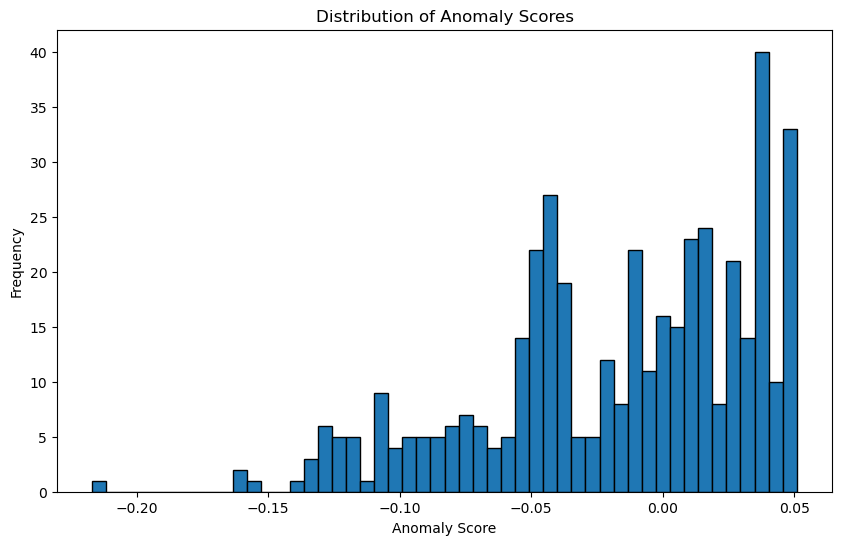

In [59]:

plt.figure(figsize=(10, 6))
plt.hist(df_Dublin['Anomaly Score'], bins=50, edgecolor='black')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.show()

In [60]:
anomaly_threshold = -0.15
anomaly_rows = df_Dublin[df_Dublin['Anomaly Score'] < anomaly_threshold]
anomaly_rows

Bedrooms  Bathrooms  House Type_Detached House  House Type_Terrace House  \
289         6          5                          1                         0   
433         8          6                          0                         1   
835         5          5                          1                         0   
852         6          6                          0                         1   

     Price_Group_230000.0-374000.0  Price_Group_374000.0-518000.0  \
289                              0                              0   
433                              0                              0   
835                              0                              0   
852                              0                              0   

     Price_Group_518000.0-662000.0  Price_Group_662000.0-806000.0  \
289                              0                              1   
433                              0                              1   
835                              1                              0   
852                              1                              0   

     Price_Group_806000.0-950000.0  District_County  District_Dublin  \
289                              0                0                1   
433                              0                0                1   
835                              0                1                0   
852                              0                0                1   

     Anomaly Score  
289      -0.156300  
433      -0.216856  
835      -0.158762  
852      -0.162793

# SENTIMENT ANALYSIS

In [61]:
# # getting User-Agent from https://httpbin.org/get
# headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36 Edg/105.0.1343.27", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}


# today = date.today() 

In [62]:
# # assigning the baseurl and putting search thourch few pages

# baseurl2 = 'https://ie.trustpilot.com'

# productlinks = []
# for x in range(1,4):
#     r = requests.get(f'https://ie.trustpilot.com/review/www.murphylarkin.com?page={x}')
#     soup = BeautifulSoup(r.content, 'html.parser')
#     productlist = soup.find_all('div', class_='styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ')

#     for item in productlist:
#         link = item.find('a', href=True)
#         if link:
#             productlinks.append(baseurl2 + link['href'])

In [63]:
# Reviews = []
# for link in productlinks:
#     r = requests.get(link, headers=headers)
#     soup = BeautifulSoup(r.content, 'lxml')
    
#     # finding line where is the 'name' of product, removing unwanted characters behind name
#     na = soup.find("span", class_="typography_heading-xxs__QKBS8 typography_appearance-default__AAY17")
#     # Extract the name
#     name = na.get_text(strip=True)
    
    
#     no = soup.find("span", class_="typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l")
#     Number = no.get_text(strip=True)
#     Number2 = Number.replace("reviews", "").replace("review", "")

#     if soup.find(text='Verified'):
#         verified = 'Yes'
#     else:
#         verified = 'No'
        
#     t = soup.find('h2', class_='typography_heading-s__f7029 typography_appearance-default__AAY17')
#     title = t.get_text(strip=True)
    
#     re = soup.find('p', class_ = 'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn')
#     Review = re.get_text(strip=True)
 
#     # extracting the 'time' element
#     time_element = soup.find('time')

#     # extracting the 'datetime' attribute value
#     datetime_str = time_element['datetime']

#     # defining the format string for parsing the datetime
#     format_str = "%Y-%m-%dT%H:%M:%S.%fZ"

#     # converting the datetime string to a datetime object
#     datetime_obj = datetime.strptime(datetime_str, format_str)

#     # extracting the date and time components
#     date = datetime_obj.date()
#     time = datetime_obj.time()


#     # creating a dictionary to save data
#     rev = {
#         'Date': date,
#         'Time': time,
#         'Name' :name,
#         'Verified':verified,
#         'No of Reviews':Number2,
#         'Title': title,
#         'Review':Review}
#     Reviews.append(rev)
#     print(rev)

C:\Users\ester\AppData\Local\Temp\ipykernel_19820\3328473537.py:16: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.



{'Date': datetime.date(2023, 5, 18), 'Time': datetime.time(21, 52, 1), 'Name': 'Ollie Keating', 'Verified': 'Yes', 'No of Reviews': '2', 'Title': 'Very fast service …I also got a email…', 'Review': 'Very fast service …I also got a email to track my order and phone call to make sure I got my delivery 📦 I’ll purchase here 100% again'}
{'Date': datetime.date(2023, 5, 12), 'Time': datetime.time(21, 21, 14), 'Name': 'AUDREY QUINN', 'Verified': 'Yes', 'No of Reviews': '3', 'Title': 'DEANTA DOORS Black Glass . We ordered our doors on the Tuesday not…', 'Review': 'We ordered our doors on the Tuesday not anticipating them to arrive for at least 12 days and Amazingly they arrived on the Thursday 2 days later.with clear instructions on how to acclimatise to their environment.We are very happy with the service and we will he returning to the website again.'}
{'Date': datetime.date(2023, 5, 19), 'Time': datetime.time(16, 3, 6), 'Name': 'Pablo Sanchez', 'Verified': 'Yes', 'No of Reviews': '7', 'Titl

In [ ]:
# # transforming dictionary into DF
# df = pd.DataFrame(Reviews)
# df.head(10)

In [ ]:
# saving file into and excel file
# df.to_excel('C:\\ESTERA\\CA2\\data sets - IRL\\Sentiment.xlsx', index=False)

In [64]:
# loading the Sentiment file
df = pd.read_excel('C:\\ESTERA\\CA2\\data sets - IRL\\Sentiment.xlsx')
df.head()

Date      Time            Name Verified  No of Reviews  \
0 2023-05-12  21:21:14    AUDREY QUINN      Yes              3   
1 2023-05-10  20:59:35         Stephen      Yes              6   
2 2023-05-08  08:20:21     Emmet Gaule      Yes              2   
3 2023-05-09  18:34:28     Gavin Tuite      Yes              3   
4 2023-05-10  22:36:53  Richard Sayers      Yes              1   

                                               Title  \
0  DEANTA DOORS Black Glass . We ordered our door...   
1                                 Excellent service!   
2               Great service in the Tramore branch.   
3           Good service and delivery however quite…   
4            Great service ordered online and got a…   

                                              Review  
0  We ordered our doors on the Tuesday not antici...  
1  Excellent service!Ordered delivered within 2 d...  
2  Order placed online. Follow up call with me to...  
3  Good service and delivery however quite a few ...  
4  Great service ordered online and got a call ne...

In [65]:
# keeping only the first name
df['First Name'] = df['Name'].str.split().str[0]

# dropping the original 'Name' column
df.drop('Name', axis=1, inplace=True)

In [66]:
# creating the function to get gender from a name
def get_gender(name):
    try:
        genders = Genderize().get([name])
        if genders:
            gender = genders[0]['gender']
            probability = genders[0]['probability']
            if probability >= 0.9:
                return gender
    except:
        pass
    return 'Unknown'

# appling the gender detection function to each name in the DataFrame column
df['Gender'] = df['First Name'].apply(get_gender)


In [67]:
# checking columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           60 non-null     datetime64[ns]
 1   Time           60 non-null     object        
 2   Verified       60 non-null     object        
 3   No of Reviews  60 non-null     int64         
 4   Title          60 non-null     object        
 5   Review         60 non-null     object        
 6   First Name     60 non-null     object        
 7   Gender         60 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 3.9+ KB


In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ester\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
# putting all in lower case
df['Review_mod'] = df['Review'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [70]:
# checking the sentiment for each review
df['sentiment'] = df['Review_mod'].apply(lambda x :TextBlob(x).sentiment[0])

In [71]:
df.head()

Date      Time Verified  No of Reviews  \
0 2023-05-12  21:21:14      Yes              3   
1 2023-05-10  20:59:35      Yes              6   
2 2023-05-08  08:20:21      Yes              2   
3 2023-05-09  18:34:28      Yes              3   
4 2023-05-10  22:36:53      Yes              1   

                                               Title  \
0  DEANTA DOORS Black Glass . We ordered our door...   
1                                 Excellent service!   
2               Great service in the Tramore branch.   
3           Good service and delivery however quite…   
4            Great service ordered online and got a…   

                                              Review First Name  Gender  \
0  We ordered our doors on the Tuesday not antici...     AUDREY  female   
1  Excellent service!Ordered delivered within 2 d...    Stephen    male   
2  Order placed online. Follow up call with me to...      Emmet    male   
3  Good service and delivery however quite a few ...      Gavin    male   
4  Great service ordered online and got a call ne...    Richard    male   

                                          Review_mod  sentiment  
0  we ordered our doors on the tuesday not antici...   0.350000  
1  excellent service!ordered delivered within 2 d...   0.468750  
2  order placed online. follow up call with me to...   0.165000  
3  good service and delivery however quite a few ...   0.400000  
4  great service ordered online and got a call ne...   0.333333

In [72]:
df['sentiment'].describe()

count    60.000000
mean      0.413270
std       0.196167
min       0.083600
25%       0.276979
50%       0.404762
75%       0.533750
max       1.000000
Name: sentiment, dtype: float64

In [73]:
# converting the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# extracting the week start and end dates from the 'Date' column
df['Week Start'] = df['Date'] - pd.to_timedelta(df['Date'].dt.dayofweek, unit='D')
df['Week End'] = df['Week Start'] + pd.to_timedelta(6, unit='D')

# grouping the DataFrame by week start and end dates and calculate the average sentiment
df_weekly_avg_sentiment = df.groupby(['Week Start', 'Week End'])['sentiment'].mean().reset_index()

# printing the new DataFrame
df_weekly_avg_sentiment

Week Start   Week End  sentiment
0  2022-09-12 2022-09-18   0.403352
1  2022-10-03 2022-10-09   0.462289
2  2022-10-10 2022-10-16   0.428667
3  2022-10-17 2022-10-23   0.518095
4  2022-10-24 2022-10-30   0.156111
5  2022-11-14 2022-11-20   0.316667
6  2022-11-21 2022-11-27   0.311905
7  2022-11-28 2022-12-04   0.298889
8  2022-12-12 2022-12-18   0.425000
9  2022-12-19 2022-12-25   0.100000
10 2023-01-09 2023-01-15   0.409524
11 2023-01-16 2023-01-22   0.405000
12 2023-01-23 2023-01-29   0.619819
13 2023-01-30 2023-02-05   0.346402
14 2023-02-06 2023-02-12   0.474317
15 2023-02-20 2023-02-26   0.351826
16 2023-02-27 2023-03-05   0.373958
17 2023-03-06 2023-03-12   0.083600
18 2023-03-13 2023-03-19   0.762500
19 2023-03-20 2023-03-26   1.000000
20 2023-03-27 2023-04-02   0.409896
21 2023-04-03 2023-04-09   0.448472
22 2023-04-17 2023-04-23   0.552500
23 2023-04-24 2023-04-30   0.277778
24 2023-05-01 2023-05-07   0.390667
25 2023-05-08 2023-05-14   0.390430
26 2023-05-15 2023-05-21   0.166667

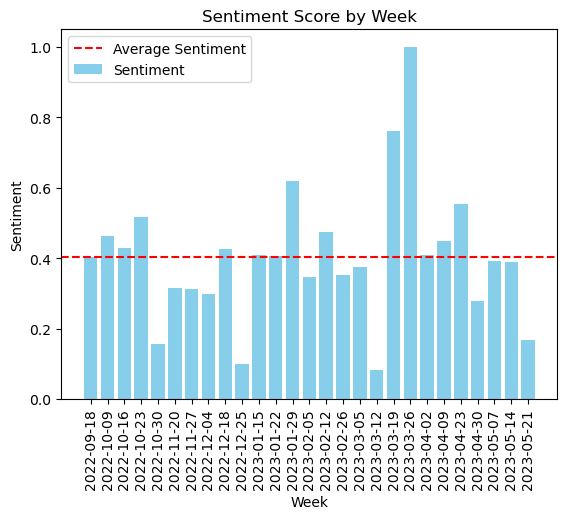

In [74]:
# extracting the date from the 'Week End' column
df_weekly_avg_sentiment['Week End'] = pd.to_datetime(df_weekly_avg_sentiment['Week End']).dt.date

# calculating the average sentiment
avg_sentiment = df_weekly_avg_sentiment['sentiment'].mean()

# ploting the bar chart
X = df_weekly_avg_sentiment['Week End']
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.0, df_weekly_avg_sentiment['sentiment'], 0.8, color='skyblue', label='Sentiment')

# adding horizontal line for the average sentiment value
plt.axhline(y=avg_sentiment, color='red', linestyle='--', label='Average Sentiment')

plt.xticks(X_axis, X)
plt.xticks(rotation=90)

plt.xlabel("Week")
plt.ylabel("Sentiment")
plt.title("Sentiment Score by Week")
plt.legend()
plt.show()

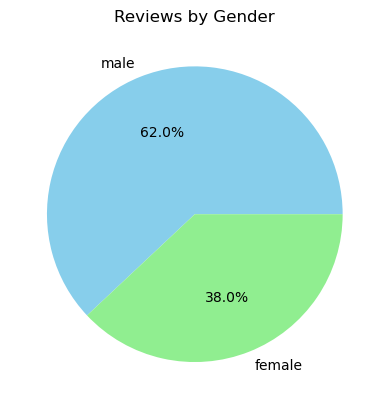

In [75]:
# filtering the DataFrame to exclude 'Unknown' gender
filtered_df = df[df['Gender'] != 'Unknown']

# calculateing the number of reviews by gender
review_counts = filtered_df['Gender'].value_counts()

# creating a pie chart
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])

# adding title
plt.title('Reviews by Gender')

# displaing the plot
plt.show()

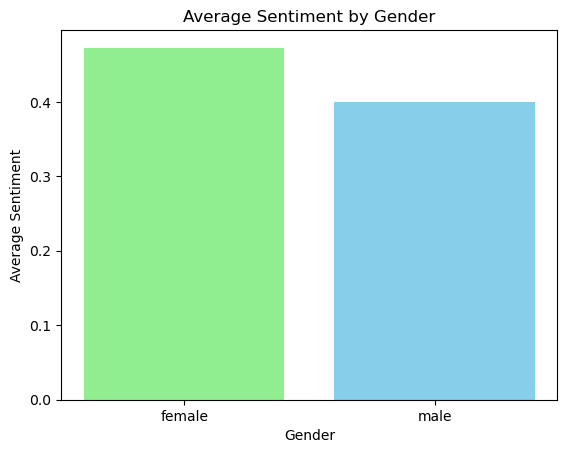

In [76]:
# filtering the DataFrame to exclude 'Unknown' gender
filtered_df = df[df['Gender'] != 'Unknown']

# calculating the average sentiment by gender
average_sentiment = filtered_df.groupby('Gender')['sentiment'].mean()

# creating a bar chart
plt.bar(average_sentiment.index, average_sentiment, color=['lightgreen','skyblue'])

# adding labels and title
plt.xlabel('Gender')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Gender')

# displaing the plot
plt.show()

In [77]:
# converting 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# extracting the hour from the 'Time' column
df['Hour'] = df['Time'].dt.hour

In [78]:
# counting the number of reviews by hour
reviews_by_hour = df.groupby('Hour')['Review'].count()
reviews_by_hour.head()

Hour
1    1
4    2
7    2
8    4
9    4
Name: Review, dtype: int64

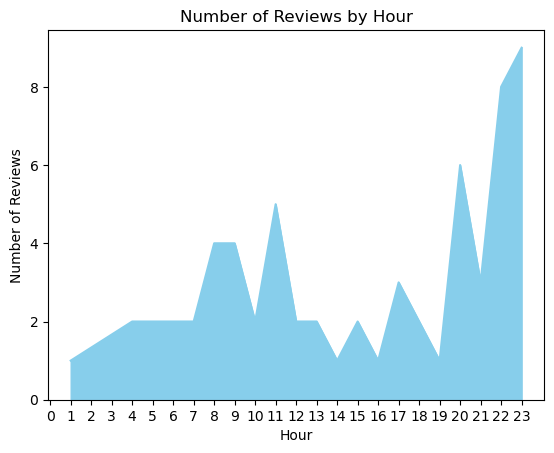

In [79]:
# creating an area chart with skyblue color
reviews_by_hour.plot.area(color='skyblue')

# adding labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Hour')

# seting x-ticks for each hour
plt.xticks(range(24))

# displaing the plot
plt.show()

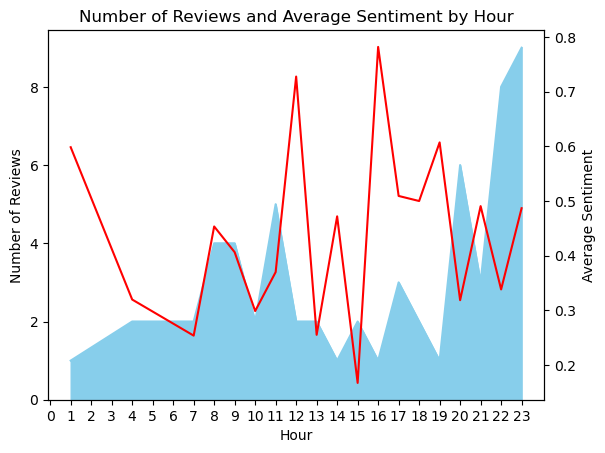

In [80]:
# calculating the average sentiment by hour
avg_sentiment_by_hour = df.groupby('Hour')['sentiment'].mean()

# counting the number of reviews by hour
reviews_by_hour = df.groupby('Hour')['Review'].count()

# creating an area chart with skyblue color
ax1 = reviews_by_hour.plot.area(color='skyblue')
ax1.set_ylabel('Number of Reviews')

# creating a secondary y-axis for average sentiment
ax2 = ax1.twinx()
ax2.plot(avg_sentiment_by_hour.index, avg_sentiment_by_hour, color='red')
ax2.set_ylabel('Average Sentiment')

# adding labels and title
ax1.set_xlabel('Hour')
ax1.set_title('Number of Reviews and Average Sentiment by Hour')

# seting x-ticks for each hour
plt.xticks(range(24))

# displaing the plot
plt.show()

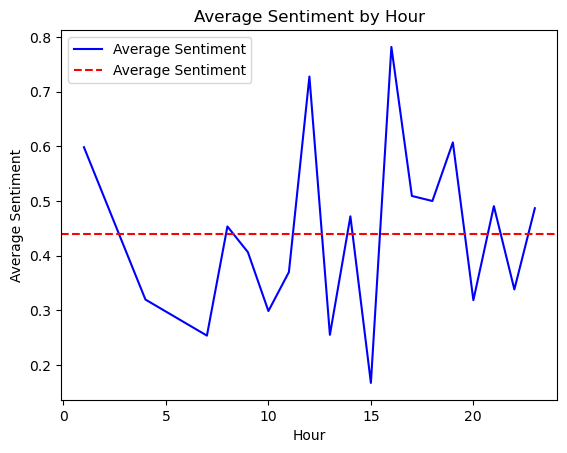

In [81]:
# calculating the average sentiment by hour
avg_sentiment_by_hour = df.groupby('Hour')['sentiment'].mean()

# Ppoting the average sentiment line chart
plt.plot(avg_sentiment_by_hour.index, avg_sentiment_by_hour, color='blue', label='Average Sentiment')

# adding horizontal line for the average sentiment value
avg_sentiment = avg_sentiment_by_hour.mean()
plt.axhline(y=avg_sentiment, color='red', linestyle='--', label='Average Sentiment')

# adding labels and title
plt.xlabel('Hour')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Hour')

# displaing the legend
plt.legend()

# displaing the plot
plt.show()

In [82]:
# sorting df with ascending 
sorted_df = df.sort_values('sentiment', ascending= False)

lowest_sentiment_rows = sorted_df.head(5)

# printing full reviews with the lowest sentiment score
for review in lowest_sentiment_rows['Review']:
    print(review)

Excellent service, delivered promptly with phone call to check goods had been received. Thank you.
Very good coffee. Very happy with my order. I would recommend this company.
Very easy to place an order and delivery was excellent. All done efficiently
Brilliant service, product delivered within 4 days of ordering and a follow up telephone call to check everything was OK!
Excellent service my package arrived 48hours after my order very keenly priced and the product was the one I wanted. A follow up phone call from the company to ensure I was happy was a really nice touch I would use them again well done Murphy Larkin


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           60 non-null     datetime64[ns]
 1   Time           60 non-null     datetime64[ns]
 2   Verified       60 non-null     object        
 3   No of Reviews  60 non-null     int64         
 4   Title          60 non-null     object        
 5   Review         60 non-null     object        
 6   First Name     60 non-null     object        
 7   Gender         60 non-null     object        
 8   Review_mod     60 non-null     object        
 9   sentiment      60 non-null     float64       
 10  Week Start     60 non-null     datetime64[ns]
 11  Week End       60 non-null     datetime64[ns]
 12  Hour           60 non-null     int64         
dtypes: datetime64[ns](4), float64(1), int64(2), object(6)
memory usage: 6.2+ KB


In [84]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.date

In [85]:
df['Date']

0    2023-05-12
1    2023-05-10
2    2023-05-08
3    2023-05-09
4    2023-05-10
5    2023-05-10
6    2023-05-08
7    2023-04-26
8    2023-05-01
9    2023-04-20
10   2023-05-16
11   2023-05-06
12   2023-05-14
13   2023-04-03
14   2023-05-09
15   2023-03-01
16   2023-03-06
17   2023-03-31
18   2023-02-24
19   2023-02-02
20   2023-02-08
21   2023-04-21
22   2023-04-06
23   2023-03-30
24   2023-05-06
25   2023-02-08
26   2023-02-21
27   2022-11-22
28   2022-12-14
29   2023-02-12
30   2023-03-31
31   2023-03-01
32   2022-11-29
33   2023-05-04
34   2023-01-30
35   2023-03-31
36   2023-02-23
37   2023-01-27
38   2022-11-15
39   2022-12-23
40   2023-05-12
41   2023-02-23
42   2023-04-04
43   2023-01-26
44   2022-09-17
45   2022-10-17
46   2022-10-18
47   2022-10-25
48   2023-03-18
49   2023-01-11
50   2023-01-19
51   2022-10-06
52   2023-03-24
53   2023-01-17
54   2023-05-01
55   2022-09-15
56   2022-10-05
57   2022-09-16
58   2023-01-26
59   2022-10-14
Name: Date, dtype: datetime64[ns]

In [86]:
df = df[df['Gender'] != 'Unknown']

In [87]:
# converting the DataFrame to CSV format
csv_data = df.to_csv(index=False)

import base64

# encoding the CSV data as base64 needed for Tinker
base64_data = base64.b64encode(csv_data.encode()).decode()
base64_data

'RGF0ZSxUaW1lLFZlcmlmaWVkLE5vIG9mIFJldmlld3MsVGl0bGUsUmV2aWV3LEZpcnN0IE5hbWUsR2VuZGVyLFJldmlld19tb2Qsc2VudGltZW50LFdlZWsgU3RhcnQsV2VlayBFbmQsSG91cg0KMjAyMy0wNS0xMiwyMDIzLTA1LTIxIDIxOjIxOjE0LFllcywzLERFQU5UQSBET09SUyBCbGFjayBHbGFzcyAuIFdlIG9yZGVyZWQgb3VyIGRvb3JzIG9uIHRoZSBUdWVzZGF5IG5vdOKApixXZSBvcmRlcmVkIG91ciBkb29ycyBvbiB0aGUgVHVlc2RheSBub3QgYW50aWNpcGF0aW5nIHRoZW0gdG8gYXJyaXZlIGZvciBhdCBsZWFzdCAxMiBkYXlzIGFuZCBBbWF6aW5nbHkgdGhleSBhcnJpdmVkIG9uIHRoZSBUaHVyc2RheSAyIGRheXMgbGF0ZXIud2l0aCBjbGVhciBpbnN0cnVjdGlvbnMgb24gaG93IHRvIGFjY2xpbWF0aXNlIHRvIHRoZWlyIGVudmlyb25tZW50LldlIGFyZSB2ZXJ5IGhhcHB5IHdpdGggdGhlIHNlcnZpY2UgYW5kIHdlIHdpbGwgaGUgcmV0dXJuaW5nIHRvIHRoZSB3ZWJzaXRlIGFnYWluLixBVURSRVksZmVtYWxlLHdlIG9yZGVyZWQgb3VyIGRvb3JzIG9uIHRoZSB0dWVzZGF5IG5vdCBhbnRpY2lwYXRpbmcgdGhlbSB0byBhcnJpdmUgZm9yIGF0IGxlYXN0IDEyIGRheXMgYW5kIGFtYXppbmdseSB0aGV5IGFycml2ZWQgb24gdGhlIHRodXJzZGF5IDIgZGF5cyBsYXRlci53aXRoIGNsZWFyIGluc3RydWN0aW9ucyBvbiBob3cgdG8gYWNjbGltYXRpc2UgdG8gdGhlaXIgZW52aXJvbm1lbnQud2UgYXJlIHZlcnk

# 7. TINKER

In [88]:
import io
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


# defining the base64-encoded CSV data
base64_data =  'RGF0ZSxUaW1lLFZlcmlmaWVkLE5vIG9mIFJldmlld3MsVGl0bGUsUmV2aWV3LEZpcnN0IE5hbWUsR2VuZGVyLFJldmlld19tb2Qsc2VudGltZW50LFdlZWsgU3RhcnQsV2VlayBFbmQsSG91cg0KMjAyMy0wNS0xMiwyMDIzLTA1LTE5IDIxOjIxOjE0LFllcywzLERFQU5UQSBET09SUyBCbGFjayBHbGFzcyAuIFdlIG9yZGVyZWQgb3VyIGRvb3JzIG9uIHRoZSBUdWVzZGF5IG5vdOKApixXZSBvcmRlcmVkIG91ciBkb29ycyBvbiB0aGUgVHVlc2RheSBub3QgYW50aWNpcGF0aW5nIHRoZW0gdG8gYXJyaXZlIGZvciBhdCBsZWFzdCAxMiBkYXlzIGFuZCBBbWF6aW5nbHkgdGhleSBhcnJpdmVkIG9uIHRoZSBUaHVyc2RheSAyIGRheXMgbGF0ZXIud2l0aCBjbGVhciBpbnN0cnVjdGlvbnMgb24gaG93IHRvIGFjY2xpbWF0aXNlIHRvIHRoZWlyIGVudmlyb25tZW50LldlIGFyZSB2ZXJ5IGhhcHB5IHdpdGggdGhlIHNlcnZpY2UgYW5kIHdlIHdpbGwgaGUgcmV0dXJuaW5nIHRvIHRoZSB3ZWJzaXRlIGFnYWluLixBVURSRVksZmVtYWxlLHdlIG9yZGVyZWQgb3VyIGRvb3JzIG9uIHRoZSB0dWVzZGF5IG5vdCBhbnRpY2lwYXRpbmcgdGhlbSB0byBhcnJpdmUgZm9yIGF0IGxlYXN0IDEyIGRheXMgYW5kIGFtYXppbmdseSB0aGV5IGFycml2ZWQgb24gdGhlIHRodXJzZGF5IDIgZGF5cyBsYXRlci53aXRoIGNsZWFyIGluc3RydWN0aW9ucyBvbiBob3cgdG8gYWNjbGltYXRpc2UgdG8gdGhlaXIgZW52aXJvbm1lbnQud2UgYXJlIHZlcnkgaGFwcHkgd2l0aCB0aGUgc2VydmljZSBhbmQgd2Ugd2lsbCBoZSByZXR1cm5pbmcgdG8gdGhlIHdlYnNpdGUgYWdhaW4uLDAuMzUsMjAyMy0wNS0wOCwyMDIzLTA1LTE0LDIxDQoyMDIzLTA1LTEwLDIwMjMtMDUtMTkgMjA6NTk6MzUsWWVzLDYsRXhjZWxsZW50IHNlcnZpY2UhLEV4Y2VsbGVudCBzZXJ2aWNlIU9yZGVyZWQgZGVsaXZlcmVkIHdpdGhpbiAyIGRheXMgLSByZWNlaXZlZCBjYWxscyB0aHJvdWdob3V0IGFuZCBhZnRlciAtIGJlc3Qgc2VydmljZS5Cb3VnaHQgZnJvbSBvdGhlciBwcm92aWRlciByZWNlbnRseSBhbmQgc2VydmljZSB3YXMgbm90IGFueXRoaW5nIGxpa2Ugc2VydmljZSBmcm9tIE11cnBoeSBMYXJraW4hLFN0ZXBoZW4sbWFsZSxleGNlbGxlbnQgc2VydmljZSFvcmRlcmVkIGRlbGl2ZXJlZCB3aXRoaW4gMiBkYXlzIC0gcmVjZWl2ZWQgY2FsbHMgdGhyb3VnaG91dCBhbmQgYWZ0ZXIgLSBiZXN0IHNlcnZpY2UuYm91Z2h0IGZyb20gb3RoZXIgcHJvdmlkZXIgcmVjZW50bHkgYW5kIHNlcnZpY2Ugd2FzIG5vdCBhbnl0aGluZyBsaWtlIHNlcnZpY2UgZnJvbSBtdXJwaHkgbGFya2luISwwLjQ2ODc1LDIwMjMtMDUtMDgsMjAyMy0wNS0xNCwyMA0KMjAyMy0wNS0wOCwyMDIzLTA1LTE5IDA4OjIwOjIxLFllcywyLEdyZWF0IHNlcnZpY2UgaW4gdGhlIFRyYW1vcmUgYnJhbmNoLixPcmRlciBwbGFjZWQgb25saW5lLiBGb2xsb3cgdXAgY2FsbCB3aXRoIG1lIHRvIGNvbmZpcm0gZXZlcnl0aGluZy4gUmVhZHkgZm9yIGNvbGxlY3Rpb24gb24gZGF0ZSBzdGF0ZWQuIFZlcnkgcHJvZmVzc2lvbmFsIHNlcnZpY2UuLEVtbWV0LG1hbGUsb3JkZXIgcGxhY2VkIG9ubGluZS4gZm9sbG93IHVwIGNhbGwgd2l0aCBtZSB0byBjb25maXJtIGV2ZXJ5dGhpbmcuIHJlYWR5IGZvciBjb2xsZWN0aW9uIG9uIGRhdGUgc3RhdGVkLiB2ZXJ5IHByb2Zlc3Npb25hbCBzZXJ2aWNlLiwwLjE2NSwyMDIzLTA1LTA4LDIwMjMtMDUtMTQsOA0KMjAyMy0wNS0wOSwyMDIzLTA1LTE5IDE4OjM0OjI4LFllcywzLEdvb2Qgc2VydmljZSBhbmQgZGVsaXZlcnkgaG93ZXZlciBxdWl0ZeKApiwiR29vZCBzZXJ2aWNlIGFuZCBkZWxpdmVyeSBob3dldmVyIHF1aXRlIGEgZmV3IGRlZmVjdHMgaW4gdGhlIHByaW1lZCB0aW1iZXIgLCBjaGlwcyBhbmQgZ291Z2VzIGFuZCBwYWludCBvdmVyc3ByYXkgLiBBcmNoaXRyYXZlIG5lZWRlZCBhIGdvb2Qgc2FuZCBiZWZvcmUgaW5zdGFsbGF0aW9uLiBSZXBsYWNlbWVudCBib2FyZHMgd2VyZSBwcm92aWRlZCBmcmVlIG9mIGNoYXJnZSB3aGVuIEkgcHJvdmlkZWQgcGhvdG9zIG9mIHRoZSBkYW1hZ2VkIGJvYXJkcyBzbyBJIHdvdWxkIGJ1eSB0aGVyZSBhZ2FpbiIsR2F2aW4sbWFsZSwiZ29vZCBzZXJ2aWNlIGFuZCBkZWxpdmVyeSBob3dldmVyIHF1aXRlIGEgZmV3IGRlZmVjdHMgaW4gdGhlIHByaW1lZCB0aW1iZXIgLCBjaGlwcyBhbmQgZ291Z2VzIGFuZCBwYWludCBvdmVyc3ByYXkgLiBhcmNoaXRyYXZlIG5lZWRlZCBhIGdvb2Qgc2FuZCBiZWZvcmUgaW5zdGFsbGF0aW9uLiByZXBsYWNlbWVudCBib2FyZHMgd2VyZSBwcm92aWRlZCBmcmVlIG9mIGNoYXJnZSB3aGVuIGkgcHJvdmlkZWQgcGhvdG9zIG9mIHRoZSBkYW1hZ2VkIGJvYXJkcyBzbyBpIHdvdWxkIGJ1eSB0aGVyZSBhZ2FpbiIsMC40LDIwMjMtMDUtMDgsMjAyMy0wNS0xNCwxOA0KMjAyMy0wNS0xMCwyMDIzLTA1LTE5IDIyOjM2OjUzLFllcywxLEdyZWF0IHNlcnZpY2Ugb3JkZXJlZCBvbmxpbmUgYW5kIGdvdCBh4oCmLEdyZWF0IHNlcnZpY2Ugb3JkZXJlZCBvbmxpbmUgYW5kIGdvdCBhIGNhbGwgbmV4dCBtb3JuaW5nIHNheWluZyBvcmRlciB3YXMgcmVhZHkgZm9yIGNvbGxlY3Rpb24sUmljaGFyZCxtYWxlLGdyZWF0IHNlcnZpY2Ugb3JkZXJlZCBvbmxpbmUgYW5kIGdvdCBhIGNhbGwgbmV4dCBtb3JuaW5nIHNheWluZyBvcmRlciB3YXMgcmVhZHkgZm9yIGNvbGxlY3Rpb24sMC4zMzMzMzMzMzMzMzMzMzMzLDIwMjMtMDUtMDgsMjAyMy0wNS0xNCwyMg0KMjAyMy0wNS0wOCwyMDIzLTA1LTE5IDIwOjE5OjI5LFllcywxLFZlcnkgcHJvbXB0IGRlbGl2ZXJ5LFZlcnkgcHJvbXB0IGRlbGl2ZXJ5LiBFdmVuIGZvbGxvd2VkIHVwIHRvIG1ha2Ugc3VyZSBwYXJ0cyB3ZXJlIGRlbGl2ZXJlZCBhbmQgZXZlcnl0aGluZyB3YXMgaW4gb3JkZXIsU3RlcGhlbixtYWxlLHZlcnkgcHJvbXB0IGRlbGl2ZXJ5LiBldmVuIGZvbGxvd2VkIHVwIHRvIG1ha2Ugc3VyZSBwYXJ0cyB3ZXJlIGRlbGl2ZXJlZCBhbmQgZXZlcnl0aGluZyB3YXMgaW4gb3JkZXIsMC4zNSwyMDIzLTA1LTA4LDIwMjMtMDUtMTQsMjANCjIwMjMtMDQtMjYsMjAyMy0wNS0xOSAxMDozMTo0NCxZZXMsOSxQcm9kdWN0IGFycml2ZWQgcXVpY2tseSBhbmQgSSBldmVu4oCmLFByb2R1Y3QgYXJyaXZlZCBxdWlja2x5IGFuZCBJIGV2ZW4gcmVjZWl2ZWQgYSBmb2xsb3cgdXAgY2FsbCB0byBzZWUgaWYgZXZlcnl0aGluZyB3YXMgc2F0aXNmYWN0b3J5Lk5vdCBhY3R1YWxseSBvcGVuZWQgdGhlIHByb2R1Y3QgYXMgeWV0IGFzIHdhaXRpbmcgZm9yIGEgdHJhZGVzbWFuIGJ1dCBwYWNrYWdpbmcgbG9va3Mgb2sgc28gaG9wZWZ1bGx5IG5vIGRhbWFnZS4gV2lsbCB1cGRhdGUgYWZ0ZXIgb3BlbmluZy4sR2VycnksbWFsZSxwcm9kdWN0IGFycml2ZWQgcXVpY2tseSBhbmQgaSBldmVuIHJlY2VpdmVkIGEgZm9sbG93IHVwIGNhbGwgdG8gc2VlIGlmIGV2ZXJ5dGhpbmcgd2FzIHNhdGlzZmFjdG9yeS5ub3QgYWN0dWFsbHkgb3BlbmVkIHRoZSBwcm9kdWN0IGFzIHlldCBhcyB3YWl0aW5nIGZvciBhIHRyYWRlc21hbiBidXQgcGFja2FnaW5nIGxvb2tzIG9rIHNvIGhvcGVmdWxseSBubyBkYW1hZ2UuIHdpbGwgdXBkYXRlIGFmdGVyIG9wZW5pbmcuLDAuMjc3Nzc3Nzc3Nzc3Nzc3NywyMDIzLTA0LTI0LDIwMjMtMDQtMzAsMTANCjIwMjMtMDUtMDEsMjAyMy0wNS0xOSAyMzoyMDoxMCxZZXMsMTAsZ3JlYXQgZXhwZXJpZW5jZSBzaG9wcGluZ+KApixBcyBhbHdheXMgYSBncmVhdCBleHBlcmllbmNlIHNob3BwaW5nIHdpdGggVGhlIEVxdWluZSBXYXJlaG91c2UuIEVmZmljaWVudCBzZXJ2aWNlICYgcHJvbXB0IGRlbGl2ZXJ5LiA1IHN0YXJzICYgYSBiaWcgdGhhbmsgeW91LEx1Y3ksZmVtYWxlLGFzIGFsd2F5cyBhIGdyZWF0IGV4cGVyaWVuY2Ugc2hvcHBpbmcgd2l0aCB0aGUgZXF1aW5lIHdhcmVob3VzZS4gZWZmaWNpZW50IHNlcnZpY2UgJiBwcm9tcHQgZGVsaXZlcnkuIDUgc3RhcnMgJiBhIGJpZyB0aGFuayB5b3UsMC40LDIwMjMtMDUtMDEsMjAyMy0wNS0wNywyMw0KMjAyMy0wNS0wNiwyMDIzLTA1LTE5IDEwOjI4OjA1LFllcywyLEkgaGlnaGx5IHJlY29tbWVuZCBNdXJwaHkgTGFya2luIFRpbWJlciBQcm9kdWN0cywiTmljZSBzZXJ2aWNlLCBmYXN0IGRlbGl2ZXJ5LiBJIGhpZ2hseSByZWNvbW1lbmQgdGhpcyBzZWxsZXIiLE1hcmdhcml0YSxmZW1hbGUsIm5pY2Ugc2VydmljZSwgZmFzdCBkZWxpdmVyeS4gaSBoaWdobHkgcmVjb21tZW5kIHRoaXMgc2VsbGVyIiwwLjMyLDIwMjMtMDUtMDEsMjAyMy0wNS0wNywxMA0KMjAyMy0wNS0xNCwyMDIzLTA1LTE5IDA5OjA2OjMxLFllcywzLEkgbG92ZSBSZXZvbHV0LiwiSSBmaW5kIFJldm9sdXQgYSB2ZXJ5IGVhc3kgdG8gdXNlIGFuZCBlZmZpY2llbnQgc2VydmljZS4gVGhlIHNlY3VyaXR5IGZlYXR1cmVzIGFyZSBzdHJvbmcsICBhbmQgSSBjYW4gZG8gYWxsIEkgbmVlZCB0byBmcm9tIG15IGhvbWUuIixNaWNoYWVsLG1hbGUsImkgZmluZCByZXZvbHV0IGEgdmVyeSBlYXN5IHRvIHVzZSBhbmQgZWZmaWNpZW50IHNlcnZpY2UuIHRoZSBzZWN1cml0eSBmZWF0dXJlcyBhcmUgc3Ryb25nLCBhbmQgaSBjYW4gZG8gYWxsIGkgbmVlZCB0byBmcm9tIG15IGhvbWUuIiwwLjQ5ODMzMzMzMzMzMzMzMzMsMjAyMy0wNS0wOCwyMDIzLTA1LTE0LDkNCjIwMjMtMDQtMDMsMjAyMy0wNS0xOSAyMjozMDoyNixZZXMsMyxJc3N1ZSB3aXRoIHRoZSBkZWxpdmVyeSBvcmlnaW5hbGx5IGJ1dOKApixJc3N1ZSB3aXRoIHRoZSBkZWxpdmVyeSBvcmlnaW5hbGx5IGJ1dCBjaGF0IHN1cHBvcnQgKEpvaG4pIHJlc29sdmVkIGl0IGltbWVkaWF0ZWx5LiBBIGNvbXBhbnkgY2FuIGJlIGJlc3QganVkZ2VkIG9uIGhvdyB0aGV5IGhhbmRsZSBzaXR1YXRpb25zIHdoZW4gc29tZXRoaW5nICBnb2VzIHdyb25nIGFuZCB0aGlzIHdhcyBoYW5kbGVkIHBlcmZlY3RseS5XaWxsIGNvbnRpbnVlIHRvIHVzZSBmb3IgYWxsIHN1cHBsaWVzIGdvaW5nIGZvcndhcmQuLE1pa2UsbWFsZSxpc3N1ZSB3aXRoIHRoZSBkZWxpdmVyeSBvcmlnaW5hbGx5IGJ1dCBjaGF0IHN1cHBvcnQgKGpvaG4pIHJlc29sdmVkIGl0IGltbWVkaWF0ZWx5LiBhIGNvbXBhbnkgY2FuIGJlIGJlc3QganVkZ2VkIG9uIGhvdyB0aGV5IGhhbmRsZSBzaXR1YXRpb25zIHdoZW4gc29tZXRoaW5nIGdvZXMgd3JvbmcgYW5kIHRoaXMgd2FzIGhhbmRsZWQgcGVyZmVjdGx5LndpbGwgY29udGludWUgdG8gdXNlIGZvciBhbGwgc3VwcGxpZXMgZ29pbmcgZm9yd2FyZC4sMC4yOTE2NjY2NjY2NjY2NjY3LDIwMjMtMDQtMDMsMjAyMy0wNC0wOSwyMg0KMjAyMy0wNS0wOSwyMDIzLTA1LTE5IDE4OjEyOjEzLFllcywxLEVmZmljaWVudCBhbmQgbmljZSBmb29sb3cgdXAgY2FsbCB3aXRo4oCmLEVmZmljaWVudCBhbmQgbmljZSBmb29sb3cgdXAgY2FsbCB3aXRoIGFkdm9jcixQZXRlcixtYWxlLGVmZmljaWVudCBhbmQgbmljZSBmb29sb3cgdXAgY2FsbCB3aXRoIGFkdm9jciwwLjYsMjAyMy0wNS0wOCwyMDIzLTA1LTE0LDE4DQoyMDIzLTAzLTAxLDIwMjMtMDUtMTkgMjM6MTM6NTAsWWVzLDIsNeKYhiBJJ20gc29vb29vIGhhcHB5IHdpdGggb3VyIHBhbmVscywiNeKYhiBJJ20gc29vb29vIGhhcHB5IHdpdGggb3VyIHBhbmVscyB3aGljaCB3ZSBwdXQgdXAgdGhpcyBhZnRlcm5vb24uICBUaGV5IGxvb2sgRkFCISFNdXJwaHkgTGFya2luIHJlYWxseSBpbXByZXNzZWQgZnJvbSBzdGFydCB0byBmaW5pc2ggYmV0d2VlbjsgYW5zd2VyaW5nIG15IHBob25lIHF1ZXJpZXMgYmVmb3JlIHBsYWNpbmcgbXkgb3JkZXIsIHF1aWNrIGxlYWR0aW1lLCBmcmllbmRseSBkZWxpdmVyeSBtYW4gYW5kIGZvbGxvdyB1cCBlbWFpbHMgYWZ0ZXJ3YXJkcy4iLEpGaXR6LG1hbGUsIjXimIYgaSdtIHNvb29vbyBoYXBweSB3aXRoIG91ciBwYW5lbHMgd2hpY2ggd2UgcHV0IHVwIHRoaXMgYWZ0ZXJub29uLiB0aGV5IGxvb2sgZmFiISFtdXJwaHkgbGFya2luIHJlYWxseSBpbXByZXNzZWQgZnJvbSBzdGFydCB0byBmaW5pc2ggYmV0d2VlbjsgYW5zd2VyaW5nIG15IHBob25lIHF1ZXJpZXMgYmVmb3JlIHBsYWNpbmcgbXkgb3JkZXIsIHF1aWNrIGxlYWR0aW1lLCBmcmllbmRseSBkZWxpdmVyeSBtYW4gYW5kIGZvbGxvdyB1cCBlbWFpbHMgYWZ0ZXJ3YXJkcy4iLDAuNjI3MDgzMzMzMzMzMzMzMywyMDIzLTAyLTI3LDIwMjMtMDMtMDUsMjMNCjIwMjMtMDMtMDYsMjAyMy0wNS0xOSAxNToyNDo1MyxObywxLERlYWxpbmcgd2l0aCBNdXJwaHkgTGFya2luIHdhcyB2ZXJ5IHN0cmlhZ2h0IGZvcndhcmQgYW5kIGNvbnZlbmllbnQsIkkgd29yayBpbiB0aGUgdHJhZGUgZm9yIHRoZSBwYXN0IDIwIHllYXJzIGFuZCBEZWFsaW5nIHdpdGggTXVycGh5IExhcmtpbiB3YXMgYSBwbGVhc3VyZSBhbmQgdmVyeSBzdHJhaWdodCBmb3J3YXJkLiAgU3RhZmYgdmVyeSBrbm93bGVkZ2VhYmxlICYgaGVscGZ1bC4gQWxsIHRoZSBXUjIgcGFuZWxsaW5nLCBza2lydGluZyAsZG9vcnMgYXJjaGl0cmF2ZSBwcm9kdWN0cyBhcnJpdmVkIG9uIHRpbWUgYW5kIHdlcmUgdmVyeSBoaWdoIHF1YWxpdHkgLiBJIGhhdmUgbm8gcHJvYmxlbSByZWNvbW1lbmRpbmcgdGhlbSBvciB1c2luZyB0aGVtIGluIGZ1dHVyZSBwcm9qZWN0cyAuIixNYWlydGluLG1hbGUsImkgd29yayBpbiB0aGUgdHJhZGUgZm9yIHRoZSBwYXN0IDIwIHllYXJzIGFuZCBkZWFsaW5nIHdpdGggbXVycGh5IGxhcmtpbiB3YXMgYSBwbGVhc3VyZSBhbmQgdmVyeSBzdHJhaWdodCBmb3J3YXJkLiBzdGFmZiB2ZXJ5IGtub3dsZWRnZWFibGUgJiBoZWxwZnVsLiBhbGwgdGhlIHdyMiBwYW5lbGxpbmcsIHNraXJ0aW5nICxkb29ycyBhcmNoaXRyYXZlIHByb2R1Y3RzIGFycml2ZWQgb24gdGltZSBhbmQgd2VyZSB2ZXJ5IGhpZ2ggcXVhbGl0eSAuIGkgaGF2ZSBubyBwcm9ibGVtIHJlY29tbWVuZGluZyB0aGVtIG9yIHVzaW5nIHRoZW0gaW4gZnV0dXJlIHByb2plY3RzIC4iLDAuMDgzNiwyMDIzLTAzLTA2LDIwMjMtMDMtMTIsMTUNCjIwMjMtMDMtMzEsMjAyMy0wNS0xOSAwNzoxNjoyMSxZZXMsMSxGYXN0IGRlbGl2ZXJ5IGFuZCBpIGxvdmUgdGhlIHdheSBob3figKYsIkZhc3QgZGVsaXZlcnkgYW5kIGkgbG92ZSB0aGUgd2F5IGhvdyB5b3UgbG9vayBhZnRlciAgeW91ciBjbGllbnRzLGkgcmVjaWV2ZWQgYSBwaG9uZSBjYWxsIGFmdGVyIGRlbGl2ZXJ5IGFuZCB3YXMgYXNrZWQgaWYgaSBnb3QgdGhlIGl0ZW0uSSBhcHByZWNpYXRlIHRoYXQgYSBodW1hbiBiZWluZyBjb250YWN0ZWQgbWUgbm90IGFuIHJvYm90ISEhISIsa3Jpc3p0aW5hLGZlbWFsZSwiZmFzdCBkZWxpdmVyeSBhbmQgaSBsb3ZlIHRoZSB3YXkgaG93IHlvdSBsb29rIGFmdGVyIHlvdXIgY2xpZW50cyxpIHJlY2lldmVkIGEgcGhvbmUgY2FsbCBhZnRlciBkZWxpdmVyeSBhbmQgd2FzIGFza2VkIGlmIGkgZ290IHRoZSBpdGVtLmkgYXBwcmVjaWF0ZSB0aGF0IGEgaHVtYW4gYmVpbmcgY29udGFjdGVkIG1lIG5vdCBhbiByb2JvdCEhISEiLDAuMjMzMzMzMzMzMzMzMzMzMywyMDIzLTAzLTI3LDIwMjMtMDQtMDIsNw0KMjAyMy0wMi0wMiwyMDIzLTA1LTE5IDE3OjA0OjU0LFllcyw5LEJyaWxsaWFudCBwcm9kdWN0cyBhbmQgc2VydmljZSEsIkkgb3JkZXJlZCBhIGZldyBwYWNrcyBvZiB0aGUgRGVhbnRhIHdhbGwgcGFuZWxsaW5nIGluIEphbnVhcnksIHN0cmFpZ2ggZm9yd2FyZCwgZWFzeSBwcm9jZXNzLiBDYWxsIGZyb20gTUwgdGhlIG5leHQgZGF5IHRvIGFkdmlzZSB0aGF0IEkgd291bGQgYmUgcmVjZXZpbmcgdGhlIG9yZGVyIHRoZSBmb2xsb3dpbmcgTW9uZGF5LCBhcnJpdmVkIHBlcmZlY3QsIGJhbmcgb24gdGltZSwgYW5kIHRvIHRvcCBpdCBvZmYgYSBmb2xsb3cgdXAgY2FsbCBhIGZldyB3ZWVrcyBsYXRlciB0byBtYWtlIHN1cmUgZXZlcnl0aGluZyB3YXMgb2suIEkgY2Fubm90IHByYWlzZSBNTCBlbm91Z2ggZm9yIHRoZWlyIGxldmVsIG9mIHNlcnZpY2UgYW5kIGVmZmljaWVuY3kuIixTYW0sbWFsZSwiaSBvcmRlcmVkIGEgZmV3IHBhY2tzIG9mIHRoZSBkZWFudGEgd2FsbCBwYW5lbGxpbmcgaW4gamFudWFyeSwgc3RyYWlnaCBmb3J3YXJkLCBlYXN5IHByb2Nlc3MuIGNhbGwgZnJvbSBtbCB0aGUgbmV4dCBkYXkgdG8gYWR2aXNlIHRoYXQgaSB3b3VsZCBiZSByZWNldmluZyB0aGUgb3JkZXIgdGhlIGZvbGxvd2luZyBtb25kYXksIGFycml2ZWQgcGVyZmVjdCwgYmFuZyBvbiB0aW1lLCBhbmQgdG8gdG9wIGl0IG9mZiBhIGZvbGxvdyB1cCBjYWxsIGEgZmV3IHdlZWtzIGxhdGVyIHRvIG1ha2Ugc3VyZSBldmVyeXRoaW5nIHdhcyBvay4gaSBjYW5ub3QgcHJhaXNlIG1sIGVub3VnaCBmb3IgdGhlaXIgbGV2ZWwgb2Ygc2VydmljZSBhbmQgZWZmaWNpZW5jeS4iLDAuMjMwMzAzMDMwMzAzMDMwMywyMDIzLTAxLTMwLDIwMjMtMDItMDUsMTcNCjIwMjMtMDQtMjEsMjAyMy0wNS0xOSAxMjowNzoyOSxZZXMsMTcsVmVyeSBnb29kIGNvZmZlZSxWZXJ5IGdvb2QgY29mZmVlLiBWZXJ5IGhhcHB5IHdpdGggbXkgb3JkZXIuIEkgd291bGQgcmVjb21tZW5kIHRoaXMgY29tcGFueS4sQWlkYW4sbWFsZSx2ZXJ5IGdvb2QgY29mZmVlLiB2ZXJ5IGhhcHB5IHdpdGggbXkgb3JkZXIuIGkgd291bGQgcmVjb21tZW5kIHRoaXMgY29tcGFueS4sMC45NTUsMjAyMy0wNC0xNywyMDIzLTA0LTIzLDEyDQoyMDIzLTA0LTA2LDIwMjMtMDUtMTkgMjI6MjY6MDksWWVzLDIsRXZlcnlvbmUgd2FzIHNvIGdyZWF0IHRvIGRlYWwgd2l0aCwiRXZlcnlvbmUgd2FzIHNvIGdyZWF0IHRvIGRlYWwgd2l0aCAsIHJlYWxseSBmcmllbmRseSBhbmQgaGVscGZ1bC4gQ29tbXVuaWNhdGlvbiB3YXMgYnJpbGxpYW50IGFuZCBJIHdhcyBkZWxpZ2hlZCB3aXRoIHRoZSBmaW5hbCBwcm9kdWN0LiIsU2luZWFkLGZlbWFsZSwiZXZlcnlvbmUgd2FzIHNvIGdyZWF0IHRvIGRlYWwgd2l0aCAsIHJlYWxseSBmcmllbmRseSBhbmQgaGVscGZ1bC4gY29tbXVuaWNhdGlvbiB3YXMgYnJpbGxpYW50IGFuZCBpIHdhcyBkZWxpZ2hlZCB3aXRoIHRoZSBmaW5hbCBwcm9kdWN0LiIsMC41MTg3NSwyMDIzLTA0LTAzLDIwMjMtMDQtMDksMjINCjIwMjMtMDMtMzAsMjAyMy0wNS0xOSAwMTowMzo1MCxZZXMsNSwiR3JlYXQgcmFuZ2Ugb2YgcHJvZHVjdHMsIGdvb2QgcHJpY2VzIixHcmVhdCByYW5nZSBvZiBwcm9kdWN0cyBzbyBJIGNvdWxkIGdldCBleGFjdGx5IHdoYXQgSSB3YW50ZWQgKHNsaWRpbmcgZG9vciByYWlsKSBhdCBhIHZlcnkgZ29vZCBwcmljZS4gT3JkZXJpbmcgd2FzIGVhc3kgYW5kIGl0IHdhcyBkZWxpdmVyZWQgd2l0aGluIDIgZGF5cy4gICAgUHJvZHVjdCB3YXMgYXMgZGVzY3JpYmVkLixCUklBTixtYWxlLGdyZWF0IHJhbmdlIG9mIHByb2R1Y3RzIHNvIGkgY291bGQgZ2V0IGV4YWN0bHkgd2hhdCBpIHdhbnRlZCAoc2xpZGluZyBkb29yIHJhaWwpIGF0IGEgdmVyeSBnb29kIHByaWNlLiBvcmRlcmluZyB3YXMgZWFzeSBhbmQgaXQgd2FzIGRlbGl2ZXJlZCB3aXRoaW4gMiBkYXlzLiBwcm9kdWN0IHdhcyBhcyBkZXNjcmliZWQuLDAuNTk4MzMzMzMzMzMzMzMzNCwyMDIzLTAzLTI3LDIwMjMtMDQtMDIsMQ0KMjAyMy0wNS0wNiwyMDIzLTA1LTE5IDExOjE2OjIxLFllcywzLFF1aWNrIGRlbGl2ZXJ5IGFuZCBmb2xsb3cgdXAsRmFzdCBkZWxpdmVyeUdyZWF0IHByb2R1Y3RzLEtldmluLG1hbGUsZmFzdCBkZWxpdmVyeWdyZWF0IHByb2R1Y3RzLDAuMiwyMDIzLTA1LTAxLDIwMjMtMDUtMDcsMTENCjIwMjMtMDItMDgsMjAyMy0wNS0xOSAyMTowNTo1NyxZZXMsMixHcmVhdCBxdWljayBhbmQgcmVsaWFibGUgc2VydmljZSBhbmQgcHJvZHVjdHMsT3JkZXIgd2FzIHNoaXBwZWQgaW4gdGltZSBhbmQgaW4gZ29vZCBjb25kaXRpb24uIFBhY2thZ2VkIHBlcmZlY3RseSBhbmQgZXZlbiByZWNlaXZlZCBhIGZvbGxvdyB1cCBjYWxsIHRvIG1ha2Ugc3VyZSBhbGwgd2FzIGluIG9yZGVyLiBXaWxsIGRlZmluaXRlbHkgYnV5IGZyb20gdGhlbSBhZ2FpbiBhbmQgaGlnaGx5IHJlY29tbWVuZCxLZXNlbixtYWxlLG9yZGVyIHdhcyBzaGlwcGVkIGluIHRpbWUgYW5kIGluIGdvb2QgY29uZGl0aW9uLiBwYWNrYWdlZCBwZXJmZWN0bHkgYW5kIGV2ZW4gcmVjZWl2ZWQgYSBmb2xsb3cgdXAgY2FsbCB0byBtYWtlIHN1cmUgYWxsIHdhcyBpbiBvcmRlci4gd2lsbCBkZWZpbml0ZWx5IGJ1eSBmcm9tIHRoZW0gYWdhaW4gYW5kIGhpZ2hseSByZWNvbW1lbmQsMC40NzIwMDAwMDAwMDAwMDAxLDIwMjMtMDItMDYsMjAyMy0wMi0xMiwyMQ0KMjAyMy0wMi0yMSwyMDIzLTA1LTE5IDIzOjA3OjU2LFllcywxLEZpcnN0IGNsYXNzIHNlcnZpY2UgYXMgdXN1YWwsIkVhc3kgdG8gcHVyY2hhc2UsIGJlc3QgcHJpY2VzIGFyb3VuZCwgZGVsaXZlcnkgdmVyeSBxdWljayBhbmQgZXZlbiBnb3QgcGhvbmUgY2FsbHMgdG8gY29uZmlybSBkZWxpdmVyeSB0aW1lcy4gVXNlZCB0d2ljZSBub3cgYW5kIHdvdWxkIGhpZ2hseSByZWNvbW1lbmQuIixQYXVsLG1hbGUsImVhc3kgdG8gcHVyY2hhc2UsIGJlc3QgcHJpY2VzIGFyb3VuZCwgZGVsaXZlcnkgdmVyeSBxdWljayBhbmQgZXZlbiBnb3QgcGhvbmUgY2FsbHMgdG8gY29uZmlybSBkZWxpdmVyeSB0aW1lcy4gdXNlZCB0d2ljZSBub3cgYW5kIHdvdWxkIGhpZ2hseSByZWNvbW1lbmQuIiwwLjUwNjY2NjY2NjY2NjY2NjcsMjAyMy0wMi0yMCwyMDIzLTAyLTI2LDIzDQoyMDIyLTEyLTE0LDIwMjMtMDUtMTkgMjA6NDY6NDIsTm8sMSxPcmRlcmVkIERvb3IgaGFuZGxlcyBvbiBNb25kYXkgZXZlbmluZywiT3JkZXJlZCBEb29yIGhhbmRsZXMgb24gTW9uZGF5IGV2ZW5pbmcsIHByb2Nlc3MgdmVyeSBzaW1wbGUgcmVjZWl2ZWQgY29uZmlybWF0aW9uIHN0cmFpZ2h0IGF3YXkuIFByb21wdCBkZWxpdmVyeSBhcyByZWNlaXZlZCBvcmRlciB0aGlzIG1vcm5pbmcgKFdlZG5lc2RheSkgYW5kIGEgcGhvbmUgY2FsbCBmcm9tIHRoZSBzdG9yZSB0byBjaGVjayBpZiBvdXIgb3JkZXIgd2FzIHJlY2VpdmVkIGFuZCBldmVyeXRoaW5nIE9LLiBHcmVhdCBDdXN0b21lciBTZXJ2aWNlISIsUGFzY2hhbCxtYWxlLCJvcmRlcmVkIGRvb3IgaGFuZGxlcyBvbiBtb25kYXkgZXZlbmluZywgcHJvY2VzcyB2ZXJ5IHNpbXBsZSByZWNlaXZlZCBjb25maXJtYXRpb24gc3RyYWlnaHQgYXdheS4gcHJvbXB0IGRlbGl2ZXJ5IGFzIHJlY2VpdmVkIG9yZGVyIHRoaXMgbW9ybmluZyAod2VkbmVzZGF5KSBhbmQgYSBwaG9uZSBjYWxsIGZyb20gdGhlIHN0b3JlIHRvIGNoZWNrIGlmIG91ciBvcmRlciB3YXMgcmVjZWl2ZWQgYW5kIGV2ZXJ5dGhpbmcgb2suIGdyZWF0IGN1c3RvbWVyIHNlcnZpY2UhIiwwLjQyNSwyMDIyLTEyLTEyLDIwMjItMTItMTgsMjANCjIwMjMtMDItMTIsMjAyMy0wNS0xOSAyMjoyNTozMyxZZXMsMSxFeGNlbGxlbnQgc2VydmljZSBmcm9tIE11cnBoeSBMYXJraW4uICBSZWNlaXZlZCBwcm9kdWN0IHdpdGhpbiAyIGRheXMgb2YgUm9kaW5nIG9ubGluZS4gICBQcm9kdWN0IGFycml2ZWQgaGVhdmlseSB3YXJwZWQgZm9yIHByb3RlY3RpbmcgYW5kIHdhcyBpbiBwZXJmZWN0IGNvbmRpdGlvbi4gIEhpZ2hseSBSZWNvbW1lbmQgTXVycGh5IExhcmtpbi4sSGFzc2xlIGZyZWUgb25saW5lIG9yZGVyaW5nLiAgUHJvZHVjdCBhcnJpdmVkIHByb21wdGx5IGluIHBlcmZlY3QgY29uZGl0aW9uLiAgRm9sbG93IHVwIGNhbGwgdG8gZW5zdXJlIHRoZSBwcm9kdWN0IHdhcyBpbiBvcmRlci4gIFZlcnkgcmVhc29uYWJsZSBwcmljZSBmb3IgcHJvZHVjdCBwdXJjaGFzZWQuLEJyZW5kYW4sbWFsZSxoYXNzbGUgZnJlZSBvbmxpbmUgb3JkZXJpbmcuIHByb2R1Y3QgYXJyaXZlZCBwcm9tcHRseSBpbiBwZXJmZWN0IGNvbmRpdGlvbi4gZm9sbG93IHVwIGNhbGwgdG8gZW5zdXJlIHRoZSBwcm9kdWN0IHdhcyBpbiBvcmRlci4gdmVyeSByZWFzb25hYmxlIHByaWNlIGZvciBwcm9kdWN0IHB1cmNoYXNlZC4sMC41NTMzMzMzMzMzMzMzMzMzLDIwMjMtMDItMDYsMjAyMy0wMi0xMiwyMg0KMjAyMy0wMy0zMSwyMDIzLTA1LTE5IDA3OjQ5OjQ3LFllcywxLFZlcnkgcHJvZmVzc2lvbmFsIGFuZCBmcmllbmRseSBzdGFmZiwiVmVyeSBwcm9mZXNzaW9uYWwgYW5kIGZyaWVuZGx5IHN0YWZmLCB3b3VsZCBoaWdobHkgcmVjb21tZW5kLk15IG9yZGVyIHdhcyBwcm9jZXNzZWQgYW5kIGRlbGl2ZXJlZCB2ZXJ5IHF1aWNrbHkuIixKdXN0aW4sbWFsZSwidmVyeSBwcm9mZXNzaW9uYWwgYW5kIGZyaWVuZGx5IHN0YWZmLCB3b3VsZCBoaWdobHkgcmVjb21tZW5kLm15IG9yZGVyIHdhcyBwcm9jZXNzZWQgYW5kIGRlbGl2ZXJlZCB2ZXJ5IHF1aWNrbHkuIiwwLjI3NDU4MzMzMzMzMzMzMzMsMjAyMy0wMy0yNywyMDIzLTA0LTAyLDcNCjIwMjMtMDMtMDEsMjAyMy0wNS0xOSAyMDoxMjo0MixZZXMsMixJIGhhZCBhIHF1ZXN0aW9uIGFib3V0IHRoZSBwcm9kdWN0IEnigKYsSSBoYWQgYSBxdWVzdGlvbiBhYm91dCB0aGUgcHJvZHVjdCBJIHdhcyBpbnRlcmVzdGVkIGluIGFuZCBpdCB3YXMgYW5zd2VyZWQgdmVyeSBwcm9tcHRseS5PbmNlIEkgZ290IHRoZSBhbnN3ZXIgdG8gbXkgcXVlc3Rpb24gSSBvcmRlcmVkIGFuZCByZWNlaXZlZCB0aGUgb3JkZXIgbGVzcyB0aGFuIDMgZGF5cyBsYXRlcuKApi4uZ3JlYXQgZGVsaXZlcnkgdGltZXMuVGhlIHByb2R1Y3QgaXRzZWxm4oCmLnlvdSBjYW4gYWJzb2x1dGVseSBmZWVsIHRoZSBxdWFsaXR5IG9mIHRoZSBoYW5kbGUgYXMgc29vbiBhcyB5b3UgcHV0IHlvdXIgaGFuZCBvbiBpdC4sQ29ub3IsbWFsZSxpIGhhZCBhIHF1ZXN0aW9uIGFib3V0IHRoZSBwcm9kdWN0IGkgd2FzIGludGVyZXN0ZWQgaW4gYW5kIGl0IHdhcyBhbnN3ZXJlZCB2ZXJ5IHByb21wdGx5Lm9uY2UgaSBnb3QgdGhlIGFuc3dlciB0byBteSBxdWVzdGlvbiBpIG9yZGVyZWQgYW5kIHJlY2VpdmVkIHRoZSBvcmRlciBsZXNzIHRoYW4gMyBkYXlzIGxhdGVy4oCmLi5ncmVhdCBkZWxpdmVyeSB0aW1lcy50aGUgcHJvZHVjdCBpdHNlbGbigKYueW91IGNhbiBhYnNvbHV0ZWx5IGZlZWwgdGhlIHF1YWxpdHkgb2YgdGhlIGhhbmRsZSBhcyBzb29uIGFzIHlvdSBwdXQgeW91ciBoYW5kIG9uIGl0LiwwLjEyMDgzMzMzMzMzMzMzMzMsMjAyMy0wMi0yNywyMDIzLTAzLTA1LDIwDQoyMDIyLTExLTI5LDIwMjMtMDUtMTkgMTM6MTc6MDAsWWVzLDEsT3JkZXJlZCBvdXIgcGFuZWxzIG9uIGEgU3VuZGF54oCmLCJPcmRlcmVkIG91ciBwYW5lbHMgb24gYSBTdW5kYXkgYWZ0ZXJub29uIGFuZCByZWNlaXZlZCB0aGVtIG9uIFdlZG5lc2RheS4gUGVyZmVjdCBwcm9kdWN0IGNvdWxkbid0IGJlIGhhcHBpZXIgd2l0aCBob3cgd2VsbCBpdCBsb29rZWQuIEkgbWFkZSBvbmUgY2FsbCB0byB0aGUgb2ZmaWNlIGFuZCB0aGUgd29tYW4gSSB3YXMgc3BlYWtpbmcgd2l0aCB3YXMgc28gaGVscGZ1bC5Eb3duIHRvIHRoZSBkZWxpdmVyeSBvZiB0aGUgcHJvZHVjdCBnb3QgYSBjYWxsIGZyb20gdGhlIGRyaXZlIHRoZSBkYXkgb2YgZGVsaXZlcnkgYW5kIHRvbGQgbWUgaXQgd291bGQgYmUgMTI6NTAgaGUgd291bGQgYmUgYXQgdGhlIGhvdXNlIGFuZCB3YXMgdGhlcmUgZG93biB0byB0aGUgc2Vjb25kLlRoZSBmb2xsb3cgdXAgY2FsbCB0byBzZWUgaWYgSSB3YXMgaGFwcHkgd2l0aCB0aGUgcGFuZWxzIHdhcyB1bmV4cGVjdGVkLCBub3QgbWFueSBjb21wYW5pZXMgb3V0IHRoZXJlIG5vdyBtYWtpbmcgdGhvc2UgY2FsbHMgYWZ0ZXIgeW91IGhhdmUgcGFpZCBmb3Igc29tZXRoaW5nLkRlZmluaXRlbHkgYSBjb21wYW55IHlvdSB3b3VsZCByZWNvbW1lbmQgdG8gYW55b25lLiIsVG9tbXksbWFsZSwib3JkZXJlZCBvdXIgcGFuZWxzIG9uIGEgc3VuZGF5IGFmdGVybm9vbiBhbmQgcmVjZWl2ZWQgdGhlbSBvbiB3ZWRuZXNkYXkuIHBlcmZlY3QgcHJvZHVjdCBjb3VsZG4ndCBiZSBoYXBwaWVyIHdpdGggaG93IHdlbGwgaXQgbG9va2VkLiBpIG1hZGUgb25lIGNhbGwgdG8gdGhlIG9mZmljZSBhbmQgdGhlIHdvbWFuIGkgd2FzIHNwZWFraW5nIHdpdGggd2FzIHNvIGhlbHBmdWwuZG93biB0byB0aGUgZGVsaXZlcnkgb2YgdGhlIHByb2R1Y3QgZ290IGEgY2FsbCBmcm9tIHRoZSBkcml2ZSB0aGUgZGF5IG9mIGRlbGl2ZXJ5IGFuZCB0b2xkIG1lIGl0IHdvdWxkIGJlIDEyOjUwIGhlIHdvdWxkIGJlIGF0IHRoZSBob3VzZSBhbmQgd2FzIHRoZXJlIGRvd24gdG8gdGhlIHNlY29uZC50aGUgZm9sbG93IHVwIGNhbGwgdG8gc2VlIGlmIGkgd2FzIGhhcHB5IHdpdGggdGhlIHBhbmVscyB3YXMgdW5leHBlY3RlZCwgbm90IG1hbnkgY29tcGFuaWVzIG91dCB0aGVyZSBub3cgbWFraW5nIHRob3NlIGNhbGxzIGFmdGVyIHlvdSBoYXZlIHBhaWQgZm9yIHNvbWV0aGluZy5kZWZpbml0ZWx5IGEgY29tcGFueSB5b3Ugd291bGQgcmVjb21tZW5kIHRvIGFueW9uZS4iLDAuMjk4ODg4ODg4ODg4ODg4OCwyMDIyLTExLTI4LDIwMjItMTItMDQsMTMNCjIwMjMtMDUtMDQsMjAyMy0wNS0xOSAyMzo1ODoyNyxZZXMsMywxMDAlIHJlY29tbWVuZCwiR3JlYXQgc2VydmljZSwgZ3JlYXQgY3VzdG9tZXIgc2VydmljZUZhc3QgZGVsaXZlcnkgYW5kIHJlYXNvbmFibGUgcHJpY2UiLENsYWlyZSxmZW1hbGUsImdyZWF0IHNlcnZpY2UsIGdyZWF0IGN1c3RvbWVyIHNlcnZpY2VmYXN0IGRlbGl2ZXJ5IGFuZCByZWFzb25hYmxlIHByaWNlIiwwLjYsMjAyMy0wNS0wMSwyMDIzLTA1LTA3LDIzDQoyMDIzLTAxLTMwLDIwMjMtMDUtMTkgMTE6Mjk6MDgsWWVzLDEsR3JlYXQgc2VydmljZSwiRGVsaWdodGVkIHRvIG9yZGVyIHRoaXMgb24gYSBTYXR1cmRheSBhbmQgcmVjZWl2ZSBkZWxpdmVyeSBvbiB0aGUgZm9sbG93aW5nIFR1ZXNkYXkuR290IGEgZm9sbG93IHVwIGNhbGwgZnJvbSBNdXJwaHkgTGFya2luIHRvIGVuc3VyZSBpdCB3YXMgZGVsaXZlcmVkIGFuZCBhbGwgd2FzIG9rLkN1c3RvbWVyIHNlcnZpY2UgbGlrZSB0aGlzIGlzIG5vdCBjb21tb24gYW55bW9yZSwgSSB3YXMgaW1wcmVzc2VkIixQYXVsLG1hbGUsImRlbGlnaHRlZCB0byBvcmRlciB0aGlzIG9uIGEgc2F0dXJkYXkgYW5kIHJlY2VpdmUgZGVsaXZlcnkgb24gdGhlIGZvbGxvd2luZyB0dWVzZGF5LmdvdCBhIGZvbGxvdyB1cCBjYWxsIGZyb20gbXVycGh5IGxhcmtpbiB0byBlbnN1cmUgaXQgd2FzIGRlbGl2ZXJlZCBhbmQgYWxsIHdhcyBvay5jdXN0b21lciBzZXJ2aWNlIGxpa2UgdGhpcyBpcyBub3QgY29tbW9uIGFueW1vcmUsIGkgd2FzIGltcHJlc3NlZCIsMC40NjI1LDIwMjMtMDEtMzAsMjAyMy0wMi0wNSwxMQ0KMjAyMy0wMy0zMSwyMDIzLTA1LTE5IDIzOjM0OjI4LFllcywyLEdyZWF0IHNlcnZpY2UgYW5kIGRlbGl2ZXJ5LEdyZWF0IHNlcnZpY2UgYW5kIGRlbGl2ZXJ5UHJvZHVjdHMgYXJyaXZlZCB0aGUgbmV4dCBkYXkuIEdyZWF0IHF1YWxpdHlIaWdobHkgcmVjb21tZW5kLFNhYnJpbmEsZmVtYWxlLGdyZWF0IHNlcnZpY2UgYW5kIGRlbGl2ZXJ5cHJvZHVjdHMgYXJyaXZlZCB0aGUgbmV4dCBkYXkuIGdyZWF0IHF1YWxpdHloaWdobHkgcmVjb21tZW5kLDAuNTMzMzMzMzMzMzMzMzMzMywyMDIzLTAzLTI3LDIwMjMtMDQtMDIsMjMNCjIwMjMtMDItMjMsMjAyMy0wNS0xOSAxMzoyMDowNCxZZXMsMyxFZmZpY2llbnQgb3JkZXIgYW5kIGRlbGl2ZXJ5IHByb2Nlc3MsIkVmZmljaWVudCBvcmRlciBhbmQgZGVsaXZlcnkgcHJvY2Vzcy4gSnVtcGVyIHF1YWxpdHksIGZpdCwgYW5kIGNvbG91ciBhcmUgZXhjZWxsZW50LiBQcmljZXMgYXJlIGhpZ2gsIGNvdWxkIG9ubHkgYWZmb3JkIG9uY2UgZGlzY291bnRlZCB1bmZvcnR1bmF0ZWx5LiIsTHVjeSxmZW1hbGUsImVmZmljaWVudCBvcmRlciBhbmQgZGVsaXZlcnkgcHJvY2Vzcy4ganVtcGVyIHF1YWxpdHksIGZpdCwgYW5kIGNvbG91ciBhcmUgZXhjZWxsZW50LiBwcmljZXMgYXJlIGhpZ2gsIGNvdWxkIG9ubHkgYWZmb3JkIG9uY2UgZGlzY291bnRlZCB1bmZvcnR1bmF0ZWx5LiIsMC4yMTE5OTk5OTk5OTk5OTk5LDIwMjMtMDItMjAsMjAyMy0wMi0yNiwxMw0KMjAyMy0wMS0yNywyMDIzLTA1LTE5IDE2OjU5OjQyLFllcyw1LEdyZWF0IGNvbXBhbnksVmVyeSBlYXN5IHRvIHBsYWNlIGFuIG9yZGVyIGFuZCBkZWxpdmVyeSB3YXMgZXhjZWxsZW50LiBBbGwgZG9uZSBlZmZpY2llbnRseSxKdWxpZSxmZW1hbGUsdmVyeSBlYXN5IHRvIHBsYWNlIGFuIG9yZGVyIGFuZCBkZWxpdmVyeSB3YXMgZXhjZWxsZW50LiBhbGwgZG9uZSBlZmZpY2llbnRseSwwLjc4MTY2NjY2NjY2NjY2NjcsMjAyMy0wMS0yMywyMDIzLTAxLTI5LDE2DQoyMDIyLTEyLTIzLDIwMjMtMDUtMTkgMDQ6NTE6MTksWWVzLDMsSGVscGZ1bCBzdGFmZixJIHdhcyBpbiB0aGUgQ2FycmFpZyBEb25uIHN0b3JlIGluIEF0aGxvbmUgd2hlcmUgSSBtZXQgYSBtYWxlIHNob3AgYXNzaXN0YW50IHdobyB3YXMgc28gdmVyeSBoZWxwZnVsIGFuZCBwb2xpdGUgdGhhdCBldmVuIHRob3VnaCB0aGUgaXRlbXMgSSB3YW50ZWQgdG8gcHVyY2hhc2Ugd2VyZSBub3QgaW4gc3RvY2sgSSB3ZW50IGhvbWUgYW5kIG9yZGVyZWQgdGhlbSBvbmxpbmUuLFBhdWxpbmUsZmVtYWxlLGkgd2FzIGluIHRoZSBjYXJyYWlnIGRvbm4gc3RvcmUgaW4gYXRobG9uZSB3aGVyZSBpIG1ldCBhIG1hbGUgc2hvcCBhc3Npc3RhbnQgd2hvIHdhcyBzbyB2ZXJ5IGhlbHBmdWwgYW5kIHBvbGl0ZSB0aGF0IGV2ZW4gdGhvdWdoIHRoZSBpdGVtcyBpIHdhbnRlZCB0byBwdXJjaGFzZSB3ZXJlIG5vdCBpbiBzdG9jayBpIHdlbnQgaG9tZSBhbmQgb3JkZXJlZCB0aGVtIG9ubGluZS4sMC4xLDIwMjItMTItMTksMjAyMi0xMi0yNSw0DQoyMDIzLTA1LTEyLDIwMjMtMDUtMTkgMTU6NTA6MDMsWWVzLDcsSXQgdG9vayAzIG1vbnRocyB0byBnZXQgYSByZXNwb25zZS4sIkFtYW5kYSBvZiBJdGNoeWZpbmdlcnMgaGFzIGp1c3QgY29tcGxldGVkIG91ciB3ZWJzaXRlLiBPdXIgbmV3IHdlYnNpdGVzIHdhcyBmYXIgZnJvbSBzdHJhaWdodGZvcndhcmQgYW5kIGhhZCBhIGxvdCBvZiBoaXN0b3JpY2FsIGNvbnRlbnQgdGhhdCBuZWVkZWQgdG8gYmUgdGlkaWVkIHVwIGFuZCBwcmVzZW50ZWQgaW4gYSB2ZXJ5IHVzZXIgZnJvZW5kbHkgd2F5LkFtYW5kYSdzIGFkdmljZSB3YXMgaW52YWx1YWJsZSByZWdhcmRpbmcgdGhlIGRlc2lnbiwgYXBwcm9hY2gsIGNvbnRlbnQgYW5kIGZ1bmN0aW9uYWxpdHkgb2Ygb3VyIG5ldyB3ZWJzaXRlLiBJIGZvdW5kIGl0IHZlcnkgZWFzeSBhbmQgZW5qb3lhYmxlIHRvIHdvcmsgd2l0aCBBbWFuZGEuVGhhbmsgeW91IEFtYW1kYS4iLEFpbmUsZmVtYWxlLCJhbWFuZGEgb2YgaXRjaHlmaW5nZXJzIGhhcyBqdXN0IGNvbXBsZXRlZCBvdXIgd2Vic2l0ZS4gb3VyIG5ldyB3ZWJzaXRlcyB3YXMgZmFyIGZyb20gc3RyYWlnaHRmb3J3YXJkIGFuZCBoYWQgYSBsb3Qgb2YgaGlzdG9yaWNhbCBjb250ZW50IHRoYXQgbmVlZGVkIHRvIGJlIHRpZGllZCB1cCBhbmQgcHJlc2VudGVkIGluIGEgdmVyeSB1c2VyIGZyb2VuZGx5IHdheS5hbWFuZGEncyBhZHZpY2Ugd2FzIGludmFsdWFibGUgcmVnYXJkaW5nIHRoZSBkZXNpZ24sIGFwcHJvYWNoLCBjb250ZW50IGFuZCBmdW5jdGlvbmFsaXR5IG9mIG91ciBuZXcgd2Vic2l0ZS4gaSBmb3VuZCBpdCB2ZXJ5IGVhc3kgYW5kIGVuam95YWJsZSB0byB3b3JrIHdpdGggYW1hbmRhLnRoYW5rIHlvdSBhbWFtZGEuIiwwLjI1MTM4MjU3NTc1NzU3NTcsMjAyMy0wNS0wOCwyMDIzLTA1LTE0LDE1DQoyMDIzLTAyLTIzLDIwMjMtMDUtMTkgMjI6MTA6MTYsWWVzLDIsRWFzeSBvcmRlciBwcm9jZXNzIGFuZCBkZWxpdmVyeSB3YXPigKYsRWFzeSBvcmRlciBwcm9jZXNzIGFuZCBkZWxpdmVyeSB3YXMgcHJvbXB0IGFuZCBjb25maXJtYXRpb24gbWFpbCBvbiBzYW1lIHNlbnQgb24uU2FsZXMgUmVwIGZvbGxvd2VkIHVwIHdpdGggYSBjYWxsIGFzIHdlbGwuR3JlYXQgd29yayxCcmlhbixtYWxlLGVhc3kgb3JkZXIgcHJvY2VzcyBhbmQgZGVsaXZlcnkgd2FzIHByb21wdCBhbmQgY29uZmlybWF0aW9uIG1haWwgb24gc2FtZSBzZW50IG9uLnNhbGVzIHJlcCBmb2xsb3dlZCB1cCB3aXRoIGEgY2FsbCBhcyB3ZWxsLmdyZWF0IHdvcmssMC4yMTY2NjY2NjY2NjY2NjY2LDIwMjMtMDItMjAsMjAyMy0wMi0yNiwyMg0KMjAyMy0wNC0wNCwyMDIzLTA1LTE5IDE3OjEzOjQyLFllcywxLEV4Y2VsbGVudCBjdXN0b21lciBzZXJ2aWNlLCJFeGNlbGxlbnQgY3VzdG9tZXIgc2VydmljZSwgZm9sbG93IHVwLCBleHRyZW1lbHkgZmFzdCBkZWxpdmVyeSBvZiBnb29kcyBhbmQgYWZ0ZXIgY2FyZSBzZXJ2aWNlIGFsc28gZXhjZWxsZW50LiBGdWxseSByZWNvbW1lbmQgTXVycGh5IExhcmtpbiB0byBhbnlvbmUgbG9va2luZyBmb3IgYSBxdWFsaXR5IHByb2R1Y3QgYW5kIGZyaWVuZGx5IGFuZCBwcm9mZXNzaW9uYWwgc3RhZmYuIixMZW9uaWUsZmVtYWxlLCJleGNlbGxlbnQgY3VzdG9tZXIgc2VydmljZSwgZm9sbG93IHVwLCBleHRyZW1lbHkgZmFzdCBkZWxpdmVyeSBvZiBnb29kcyBhbmQgYWZ0ZXIgY2FyZSBzZXJ2aWNlIGFsc28gZXhjZWxsZW50LiBmdWxseSByZWNvbW1lbmQgbXVycGh5IGxhcmtpbiB0byBhbnlvbmUgbG9va2luZyBmb3IgYSBxdWFsaXR5IHByb2R1Y3QgYW5kIGZyaWVuZGx5IGFuZCBwcm9mZXNzaW9uYWwgc3RhZmYuIiwwLjUzNSwyMDIzLTA0LTAzLDIwMjMtMDQtMDksMTcNCjIwMjMtMDEtMjYsMjAyMy0wNS0xOSAwOTozMzoyOSxZZXMsMSxkZWxpdmVyZWQgb24gdGltZSwiZGVsaXZlcmVkIG9uIHRpbWUsIGdvb2QgcXVhbGl0eSBwcm9kdWN0LCBmb2xsb3cgdXAgc2VydmljZSB0byBlbnN1cmUgZXZlcnRpbmcgd2FzIG9rLiB2ZXJ5IHJhcmUgaW4gdG9kYXlzIHdvcmxkIHRvIGdldCBnb29kIGVuZ2FnaW5nIGN1c3RvbWVyIHNlcnZpY2UuIixEYXZpZCxtYWxlLCJkZWxpdmVyZWQgb24gdGltZSwgZ29vZCBxdWFsaXR5IHByb2R1Y3QsIGZvbGxvdyB1cCBzZXJ2aWNlIHRvIGVuc3VyZSBldmVydGluZyB3YXMgb2suIHZlcnkgcmFyZSBpbiB0b2RheXMgd29ybGQgdG8gZ2V0IGdvb2QgZW5nYWdpbmcgY3VzdG9tZXIgc2VydmljZS4iLDAuNTM4LDIwMjMtMDEtMjMsMjAyMy0wMS0yOSw5DQoyMDIyLTA5LTE3LDIwMjMtMDUtMTkgMTE6MTU6MDIsWWVzLDEsVmVyeSBnb29kIGN1c3RvbWVyIHNlcnZpY2UsIlZlcnkgZ29vZCBjdXN0b21lciBzZXJ2aWNlLiBUaGV5IGNoZWNrZWQgdGhlIHN0YXR1cyBvZiB0aGUgb3JkZXIgYW5kIGtlcHQgbWUgaW5mb3JtZWQgYXMgd2hlbiB0aGUgcHJvZHVjdCB3b3VsZCBiZSBkZWxpdmVyZWQuVGhlIHByb2R1Y3QgYXJyaXZlZCBpbiBwZXJmZWN0IGNvbmRpdGlvbi4gIE5vdGhpbmcgd2FzIG1pc3NpbmcuSSBhbHNvIGFwcHJlY2lhdGVkIHRoZSBsYWNrIG9mIGV4dHJhIHBhY2tpbmcsIGp1c3Qgb25lIGNsZWFyIHBsYXN0aWMgdG8ga2VlcCB0aGUgYm94IHNlYWxlZCBhbmQgdGhlIGVuZHMgb2YgdGhlIGJveCByZWluZm9yY2VkLiIsUnVzaCxtYWxlLCJ2ZXJ5IGdvb2QgY3VzdG9tZXIgc2VydmljZS4gdGhleSBjaGVja2VkIHRoZSBzdGF0dXMgb2YgdGhlIG9yZGVyIGFuZCBrZXB0IG1lIGluZm9ybWVkIGFzIHdoZW4gdGhlIHByb2R1Y3Qgd291bGQgYmUgZGVsaXZlcmVkLnRoZSBwcm9kdWN0IGFycml2ZWQgaW4gcGVyZmVjdCBjb25kaXRpb24uIG5vdGhpbmcgd2FzIG1pc3NpbmcuaSBhbHNvIGFwcHJlY2lhdGVkIHRoZSBsYWNrIG9mIGV4dHJhIHBhY2tpbmcsIGp1c3Qgb25lIGNsZWFyIHBsYXN0aWMgdG8ga2VlcCB0aGUgYm94IHNlYWxlZCBhbmQgdGhlIGVuZHMgb2YgdGhlIGJveCByZWluZm9yY2VkLiIsMC40NDIsMjAyMi0wOS0xMiwyMDIyLTA5LTE4LDExDQoyMDIyLTEwLTE3LDIwMjMtMDUtMTkgMjE6NDI6NDAsWWVzLDEsRXhjZWxsZW50IHNlcnZpY2UgbXkgcGFja2FnZSBhcnJpdmVk4oCmLEV4Y2VsbGVudCBzZXJ2aWNlIG15IHBhY2thZ2UgYXJyaXZlZCA0OGhvdXJzIGFmdGVyIG15IG9yZGVyIHZlcnkga2Vlbmx5IHByaWNlZCBhbmQgdGhlIHByb2R1Y3Qgd2FzIHRoZSBvbmUgSSB3YW50ZWQuIEEgZm9sbG93IHVwIHBob25lIGNhbGwgZnJvbSB0aGUgY29tcGFueSB0byBlbnN1cmUgSSB3YXMgaGFwcHkgd2FzIGEgcmVhbGx5IG5pY2UgdG91Y2ggSSB3b3VsZCB1c2UgdGhlbSBhZ2FpbiB3ZWxsIGRvbmUgTXVycGh5IExhcmtpbixWaXJnaW5pYSxmZW1hbGUsZXhjZWxsZW50IHNlcnZpY2UgbXkgcGFja2FnZSBhcnJpdmVkIDQ4aG91cnMgYWZ0ZXIgbXkgb3JkZXIgdmVyeSBrZWVubHkgcHJpY2VkIGFuZCB0aGUgcHJvZHVjdCB3YXMgdGhlIG9uZSBpIHdhbnRlZC4gYSBmb2xsb3cgdXAgcGhvbmUgY2FsbCBmcm9tIHRoZSBjb21wYW55IHRvIGVuc3VyZSBpIHdhcyBoYXBweSB3YXMgYSByZWFsbHkgbmljZSB0b3VjaCBpIHdvdWxkIHVzZSB0aGVtIGFnYWluIHdlbGwgZG9uZSBtdXJwaHkgbGFya2luLDAuNjUsMjAyMi0xMC0xNywyMDIyLTEwLTIzLDIxDQoyMDIyLTEwLTE4LDIwMjMtMDUtMTkgMjM6NTk6MDgsWWVzLDEsV29vZGVuIHNsYXR0ZWQgcGFuZWxzLFZlcnkgaGFwcHkgd2l0aCB0aGUgcHJvZHVjdCBhbmQgdGhlIGZpbmFsIGxvb2sgb2YgaXQgb24gdGhlIHdhbGwuIEZhaXJseSBlYXN5IHRvIGluc3RhbGwgYW5kIGN1dCB0byBhIGRlc2lyZWQgbGVuZ3RoLiBTaW1wbGUgd2F5IG9mIG9yZGVyIHRocm91Z2ggdGhlIHdlYnNpdGUuIFZlcnkgZ29vZCBjb21tdW5pY2F0aW9uIHdpdGggZGVsaXZlcnkgZHJpdmVyIGFsc28gdmVyeSBwdW5jdHVhbC4gSGlnaGx5IHJlY29tbWVuZGVkLixLYXRlLGZlbWFsZSx2ZXJ5IGhhcHB5IHdpdGggdGhlIHByb2R1Y3QgYW5kIHRoZSBmaW5hbCBsb29rIG9mIGl0IG9uIHRoZSB3YWxsLiBmYWlybHkgZWFzeSB0byBpbnN0YWxsIGFuZCBjdXQgdG8gYSBkZXNpcmVkIGxlbmd0aC4gc2ltcGxlIHdheSBvZiBvcmRlciB0aHJvdWdoIHRoZSB3ZWJzaXRlLiB2ZXJ5IGdvb2QgY29tbXVuaWNhdGlvbiB3aXRoIGRlbGl2ZXJ5IGRyaXZlciBhbHNvIHZlcnkgcHVuY3R1YWwuIGhpZ2hseSByZWNvbW1lbmRlZC4sMC4zODYxOTA0NzYxOTA0NzYyLDIwMjItMTAtMTcsMjAyMi0xMC0yMywyMw0KMjAyMi0xMC0yNSwyMDIzLTA1LTE5IDA5OjMwOjMzLFllcyw0LEEgdmVyeSB1c2VyIGZyaWVuZGx5IHdlYnNpdGUgYW5kIHByb2Zlc3Npb25hbCBjb21wYW55LEEgdmVyeSB1c2VyIGZyaWVuZGx5IHdlYnNpdGUuIERlbGl2ZXJ5IHR3byBkYXlzIGZyb20gZGF0ZSBvZiBvcmRlci4gSSBnb3QgYSBjYWxsIHRoZSBkYXkgYmVmb3JlIHRvIGxldCBtZSBrbm93IGRlbGl2ZXJ5IG9uIHRoZSB3YXkgYW5kIGEgY2FsbCBmcm9tIHRoZSBkcml2ZXIgdGhlIG5leHQgbW9ybmluZyB0byBnaXZlIGEgdGltZSBvZiBkZWxpdmVyeTsgc28gSSBjb3VsZCBiZSB0aGVyZS4gQeKAnVJlY2VpdmVkIGEgdmVyeSB1bmV4cGVjdGVkIGZvbGxvdyB1cCBjYWxsIGEgZmV3IGRheXMgbGF0ZXIgdG8gY2hlY2sgdGhhdCB3ZSBnb3QgZXZlcnl0aGluZyBhbmQgd2VyZSBoYXBweS4gQWxsIHRvZ2V0aGVyIGEgdGhvcm91Z2hseSBwcm9mZXNzaW9uYWwgY29tcGFueSBhbmQgYSBwbGVhc3VyZSB0byBkZWFsIHdpdGguIEkgd2lsbCBkZWZpbml0ZWx5IGJlIGJhY2sgZm9yIG1vcmUuV2VsbCBkb25lIHRvIGFsbC4sQ29saW4sbWFsZSxhIHZlcnkgdXNlciBmcmllbmRseSB3ZWJzaXRlLiBkZWxpdmVyeSB0d28gZGF5cyBmcm9tIGRhdGUgb2Ygb3JkZXIuIGkgZ290IGEgY2FsbCB0aGUgZGF5IGJlZm9yZSB0byBsZXQgbWUga25vdyBkZWxpdmVyeSBvbiB0aGUgd2F5IGFuZCBhIGNhbGwgZnJvbSB0aGUgZHJpdmVyIHRoZSBuZXh0IG1vcm5pbmcgdG8gZ2l2ZSBhIHRpbWUgb2YgZGVsaXZlcnk7IHNvIGkgY291bGQgYmUgdGhlcmUuIGHigJ1yZWNlaXZlZCBhIHZlcnkgdW5leHBlY3RlZCBmb2xsb3cgdXAgY2FsbCBhIGZldyBkYXlzIGxhdGVyIHRvIGNoZWNrIHRoYXQgd2UgZ290IGV2ZXJ5dGhpbmcgYW5kIHdlcmUgaGFwcHkuIGFsbCB0b2dldGhlciBhIHRob3JvdWdobHkgcHJvZmVzc2lvbmFsIGNvbXBhbnkgYW5kIGEgcGxlYXN1cmUgdG8gZGVhbCB3aXRoLiBpIHdpbGwgZGVmaW5pdGVseSBiZSBiYWNrIGZvciBtb3JlLndlbGwgZG9uZSB0byBhbGwuLDAuMTU2MTExMTExMTExMTExMSwyMDIyLTEwLTI0LDIwMjItMTAtMzAsOQ0KMjAyMy0wMy0xOCwyMDIzLTA1LTE5IDE3OjI1OjQ2LFllcywxLEJyaWxsaWFudCBzZXJ2aWNlLCJCcmlsbGlhbnQgc2VydmljZSwgcHJvZHVjdCBkZWxpdmVyZWQgd2l0aGluIDQgZGF5cyBvZiBvcmRlcmluZyBhbmQgYSBmb2xsb3cgdXAgdGVsZXBob25lIGNhbGwgdG8gY2hlY2sgZXZlcnl0aGluZyB3YXMgT0shIixTYXJhaCxmZW1hbGUsImJyaWxsaWFudCBzZXJ2aWNlLCBwcm9kdWN0IGRlbGl2ZXJlZCB3aXRoaW4gNCBkYXlzIG9mIG9yZGVyaW5nIGFuZCBhIGZvbGxvdyB1cCB0ZWxlcGhvbmUgY2FsbCB0byBjaGVjayBldmVyeXRoaW5nIHdhcyBvayEiLDAuNzYyNSwyMDIzLTAzLTEzLDIwMjMtMDMtMTksMTcNCjIwMjMtMDEtMTEsMjAyMy0wNS0xOSAyMzowODozNyxZZXMsMSxFeGNlbGxlbnQgU2VydmljZSwiR3JlYXQsIGVhc3kgc2VydmljZSBmcm9tIG9yZGVyaW5nIHRvIGRlbGl2ZXJ5LiBBZnRlciBvcmRlcmluZyB0aGV5IGNhbGxlZCB0byBtYWtlIHN1cmUgSSBoYWQgZXZlcnl0aGluZyBJIG5lZWRlZC4gRGVsaXZlcnkgd2FzIHZlcnkgcXVpY2sgKG5leHQgZGF5KS4gV2hlbiBJIGdvdCBob21lIEkgZ290IGEgY2FsbCB0byBtYWtlIHN1cmUgSSBoYWQgdGFrZW4gcG9zc2Vzc2lvbiBvZiB0aGUgcGFja2FnZS4gV291bGQgaGlnaGx5IHJlY29tbWVuZCEiLFN0ZXdhcnQsbWFsZSwiZ3JlYXQsIGVhc3kgc2VydmljZSBmcm9tIG9yZGVyaW5nIHRvIGRlbGl2ZXJ5LiBhZnRlciBvcmRlcmluZyB0aGV5IGNhbGxlZCB0byBtYWtlIHN1cmUgaSBoYWQgZXZlcnl0aGluZyBpIG5lZWRlZC4gZGVsaXZlcnkgd2FzIHZlcnkgcXVpY2sgKG5leHQgZGF5KS4gd2hlbiBpIGdvdCBob21lIGkgZ290IGEgY2FsbCB0byBtYWtlIHN1cmUgaSBoYWQgdGFrZW4gcG9zc2Vzc2lvbiBvZiB0aGUgcGFja2FnZS4gd291bGQgaGlnaGx5IHJlY29tbWVuZCEiLDAuNDA5NTIzODA5NTIzODA5NSwyMDIzLTAxLTA5LDIwMjMtMDEtMTUsMjMNCjIwMjMtMDEtMTksMjAyMy0wNS0xOSAxMjo0NToxNixZZXMsMixHb29kIHJlc3BvbnNlIHRpbWUgb24gc2hpcHBpbmcgb3JkZXIsR29vZCByZXNwb25zZSB0aW1lIG9uIHNoaXBwaW5nIG9yZGVyLiBHcmVhdCBjdXN0b21lciAgc3VwcG9ydCAgb24gZm9sbG93IHVwIHF1ZXJ5IG9uIHByb2R1Y3QuU2hpcHBpbmcgdGltZSB3YXMgMyBkYXlzIGJ1dCB0aGlzIHdhcyBjdXJyaWVyIHJlbGF0ZWQuLEZyYW5rLG1hbGUsZ29vZCByZXNwb25zZSB0aW1lIG9uIHNoaXBwaW5nIG9yZGVyLiBncmVhdCBjdXN0b21lciBzdXBwb3J0IG9uIGZvbGxvdyB1cCBxdWVyeSBvbiBwcm9kdWN0LnNoaXBwaW5nIHRpbWUgd2FzIDMgZGF5cyBidXQgdGhpcyB3YXMgY3VycmllciByZWxhdGVkLiwwLjUsMjAyMy0wMS0xNiwyMDIzLTAxLTIyLDEyDQoyMDIyLTEwLTA2LDIwMjMtMDUtMTkgMTk6NDU6MzgsWWVzLDMsRXhjZWxsZW50IHNlcnZpY2UsRXhjZWxsZW50IHNlcnZpY2UuIERvb3Iga25vYnMgYW5kIGxvY2tpbmcgc3lzdGVtcyBjYW1lIHdpdGhpbiBhIGNvdXBsZSBvZiBkYXlzIGFuZCBJIGFsc28gcmVjZWl2ZWQgYSBmb2xsb3cgdXAgcGhvbmUgY2FsbCBjaGVja2luZyB0aGF0IGFsbCB3YXMgZGVsaXZlcmVkIGFuZCB0aGF0IHRoZSBpdGVtcyB3ZXJlIHRvIG15IHNhdGlzZmFjdGlvbi4gV291bGQgY2VydGFpbmx5IHNob3Agd2l0aCBNdXJwaHlMYXJraW4gYWdhaW4uLERlYmJpZSxmZW1hbGUsZXhjZWxsZW50IHNlcnZpY2UuIGRvb3Iga25vYnMgYW5kIGxvY2tpbmcgc3lzdGVtcyBjYW1lIHdpdGhpbiBhIGNvdXBsZSBvZiBkYXlzIGFuZCBpIGFsc28gcmVjZWl2ZWQgYSBmb2xsb3cgdXAgcGhvbmUgY2FsbCBjaGVja2luZyB0aGF0IGFsbCB3YXMgZGVsaXZlcmVkIGFuZCB0aGF0IHRoZSBpdGVtcyB3ZXJlIHRvIG15IHNhdGlzZmFjdGlvbi4gd291bGQgY2VydGFpbmx5IHNob3Agd2l0aCBtdXJwaHlsYXJraW4gYWdhaW4uLDAuNjA3MTQyODU3MTQyODU3MSwyMDIyLTEwLTAzLDIwMjItMTAtMDksMTkNCjIwMjMtMDMtMjQsMjAyMy0wNS0xOSAwODoxMzo1MixZZXMsMyxFeGNlbGxlbnQgc2VydmljZSwiRXhjZWxsZW50IHNlcnZpY2UsIGRlbGl2ZXJlZCBwcm9tcHRseSB3aXRoIHBob25lIGNhbGwgdG8gY2hlY2sgZ29vZHMgaGFkIGJlZW4gcmVjZWl2ZWQuIFRoYW5rIHlvdS4iLMOBaW5lLGZlbWFsZSwiZXhjZWxsZW50IHNlcnZpY2UsIGRlbGl2ZXJlZCBwcm9tcHRseSB3aXRoIHBob25lIGNhbGwgdG8gY2hlY2sgZ29vZHMgaGFkIGJlZW4gcmVjZWl2ZWQuIHRoYW5rIHlvdS4iLDEuMCwyMDIzLTAzLTIwLDIwMjMtMDMtMjYsOA0KMjAyMy0wMS0xNywyMDIzLTA1LTE5IDIyOjI4OjEwLFllcyw0LCJPcmRlcmVkIGEgYXR0aWMgc3RhaXJzLHF1ZXJpZWQgb24gbGluZeKApiIsIk9yZGVyZWQgYSBhdHRpYyBzdGFpcnMscXVlcmllZCBvbiBsaW5lIGFib3V0IHNpemUgYW5kIGdvdCBhIHZlcnkgcHJvbXB0IHJlc3BvbnNlICxkZWxpdmVyeSB2ZXJ5IHF1aWNrLGFuZCBJIGdvdCBhIGNhbGwgbGF0ZXIgdGhhdCBkYXkgdG8gbWFrZSBzdXJlIEkgd2FzIGhhcHB5IHdpdGggZXZlcnl0aGluZyxJIHdvdWxkIGhpZ2hseSByZWNvbW1lbmQgTXVycGh5IGxhcmtpbi4iLENvbGV0dGUsZmVtYWxlLCJvcmRlcmVkIGEgYXR0aWMgc3RhaXJzLHF1ZXJpZWQgb24gbGluZSBhYm91dCBzaXplIGFuZCBnb3QgYSB2ZXJ5IHByb21wdCByZXNwb25zZSAsZGVsaXZlcnkgdmVyeSBxdWljayxhbmQgaSBnb3QgYSBjYWxsIGxhdGVyIHRoYXQgZGF5IHRvIG1ha2Ugc3VyZSBpIHdhcyBoYXBweSB3aXRoIGV2ZXJ5dGhpbmcsaSB3b3VsZCBoaWdobHkgcmVjb21tZW5kIG11cnBoeSBsYXJraW4uIiwwLjMxLDIwMjMtMDEtMTYsMjAyMy0wMS0yMiwyMg0KMjAyMi0xMC0wNSwyMDIzLTA1LTE5IDExOjIwOjA5LFllcyw5LE9yZGVyaW5nIG1hZGUgZWFzeS4sIlRoZSBNdXJwaHkgTGFya2luIHdlYnNpdGUgd2FzIHNvIGVhc3kgdG8gbmF2aWdhdGUgYW5kIG9yZGVyIHRoZSBkb29ycyBJIHdhcyBhZnRlci4gSmVmZiBmcm9tIHRoZSBUcmFtb3JlIGJyYW5jaCB3YXMgdmVyeSBoZWxwZnVsIGFuZCByZXNwb25kZWQgcXVpY2tseSB0byB0aGUgY291cGxlIG9mIHF1ZXN0aW9ucyBJIGhhZC4gRGVsaXZlcnkgb2YgaGFuZGxlcyB0aGF0IEkgb3JkZXJlZCB3YXMgbmV4dCBkYXkgYW5kIEkgd2FzIGFibGUgdG8gY29sbGVjdCB0aGUgZG9vcnMgbXlzZWxmIGZyb20gYSBjb2xsZWN0aW9uIGNlbnRyZSBpbiBDbG9uZGFsa2luLlNvLCBmcm9tIG9yZGVyaW5nIGFsbCB0aGUgY29tcG9uZW50cyBJIHdhcyBhYmxlIHRvIGhhdmUgdGhlIGRvb3JzIGluc3RhbGxlZCBpbiBhIG1hdHRlciBvZiBhIGZldyBkYXlzLiBBbmQgdGhlIHJlc3VsdCBpcyBiZXR0ZXIgdGhhbiBJJ2QgaG9wZWQgLSBUaGUgZG9vcnMgYW5kIGhhbmRsZXMgYXJlIHRvcCBxdWFsaXR5LiBBbmQgdGhlIHByaWNlcyB3ZXJlICBwcmV0dHkgcmVhc29uYWJsZSB0b28uT3ZlcmFsbCBhIHZlcnkgZ29vZCBleHBlcmllbmNlIHdpdGggdGhpcyBjb21wYW55LiBBbmQgSSB3aWxsIGRlZmluaXRlbHkgYnV5IGZyb20gdGhlbSBhZ2FpbiBzaG91bGQgdGhlIG5lZWQgYXJpc2UhISIsU2ltb24sbWFsZSwidGhlIG11cnBoeSBsYXJraW4gd2Vic2l0ZSB3YXMgc28gZWFzeSB0byBuYXZpZ2F0ZSBhbmQgb3JkZXIgdGhlIGRvb3JzIGkgd2FzIGFmdGVyLiBqZWZmIGZyb20gdGhlIHRyYW1vcmUgYnJhbmNoIHdhcyB2ZXJ5IGhlbHBmdWwgYW5kIHJlc3BvbmRlZCBxdWlja2x5IHRvIHRoZSBjb3VwbGUgb2YgcXVlc3Rpb25zIGkgaGFkLiBkZWxpdmVyeSBvZiBoYW5kbGVzIHRoYXQgaSBvcmRlcmVkIHdhcyBuZXh0IGRheSBhbmQgaSB3YXMgYWJsZSB0byBjb2xsZWN0IHRoZSBkb29ycyBteXNlbGYgZnJvbSBhIGNvbGxlY3Rpb24gY2VudHJlIGluIGNsb25kYWxraW4uc28sIGZyb20gb3JkZXJpbmcgYWxsIHRoZSBjb21wb25lbnRzIGkgd2FzIGFibGUgdG8gaGF2ZSB0aGUgZG9vcnMgaW5zdGFsbGVkIGluIGEgbWF0dGVyIG9mIGEgZmV3IGRheXMuIGFuZCB0aGUgcmVzdWx0IGlzIGJldHRlciB0aGFuIGknZCBob3BlZCAtIHRoZSBkb29ycyBhbmQgaGFuZGxlcyBhcmUgdG9wIHF1YWxpdHkuIGFuZCB0aGUgcHJpY2VzIHdlcmUgcHJldHR5IHJlYXNvbmFibGUgdG9vLm92ZXJhbGwgYSB2ZXJ5IGdvb2QgZXhwZXJpZW5jZSB3aXRoIHRoaXMgY29tcGFueS4gYW5kIGkgd2lsbCBkZWZpbml0ZWx5IGJ1eSBmcm9tIHRoZW0gYWdhaW4gc2hvdWxkIHRoZSBuZWVkIGFyaXNlISEiLDAuMzE3NDM1ODk3NDM1ODk3NCwyMDIyLTEwLTAzLDIwMjItMTAtMDksMTENCjIwMjItMDktMTYsMjAyMy0wNS0xOSAyMzowMjo0NCxZZXMsMSxJbnN1bGF0ZWQgZG9ybWVyIGF0dGljIGRvb3IsR3JlYXQgcHJvZHVjdCBhbmQgZ3JlYXQgc2VydmljZSBmcm9tIE11cnBoeSBMYXJraW4gVGltYmVyIHByb2R1Y3RzLiBUaGUgaW5zdWxhdGVkIGRvcm1lciBhdHRpYyBkb29yIGlzIHRoZSBwZXJmZWN0IHNvbHV0aW9uIGZvciBwZW9wbGUgbG9va2luZyBmb3IgZWFzeSBhY2Nlc3MgdG8gdGhlIGV4dHJhIHN0b3JhZ2Ugc3BhY2UgaW4gZG9ybWVyIGhvdXNlcy4sSmFtZXMsbWFsZSxncmVhdCBwcm9kdWN0IGFuZCBncmVhdCBzZXJ2aWNlIGZyb20gbXVycGh5IGxhcmtpbiB0aW1iZXIgcHJvZHVjdHMuIHRoZSBpbnN1bGF0ZWQgZG9ybWVyIGF0dGljIGRvb3IgaXMgdGhlIHBlcmZlY3Qgc29sdXRpb24gZm9yIHBlb3BsZSBsb29raW5nIGZvciBlYXN5IGFjY2VzcyB0byB0aGUgZXh0cmEgc3RvcmFnZSBzcGFjZSBpbiBkb3JtZXIgaG91c2VzLiwwLjYwNjY2NjY2NjY2NjY2NjcsMjAyMi0wOS0xMiwyMDIyLTA5LTE4LDIzDQoyMDIyLTEwLTE0LDIwMjMtMDUtMTkgMTE6MjI6MzgsWWVzLDEsVmVyeSBIYXBweSwiTXVycGh5IExhcmtpbiBUaW1iZXIgUHJvZHVjdHMgYXJlIGEgdmVyeSBnb29kIGNvbXBhbnkgdG8gZGVhbCB3aXRoLCBWZXJ5IHF1aWNrIGFuZCByZXNwb25zaXZlIGFuZCBnYXZlIGFsbCB0aGUgaW5mb3JtYXRpb24gbmVjZXNzYXJ5IHRvIHByb3ZpZGUgdGhlIHByb2R1Y3Qgd2Ugd2VyZSBsb29raW5nIGZvciB1cmdlbnRseSBhcyBzYW1lIGRheSBjb2xsZWN0aW9uLlZlcnkgaGFwcHkgYW5kIHdpbGwgZGVmaWFudGx5IHdpbGwgdXNlZCB0aGlzIGNvbXBhbnkgYWdhaW4uIixPJ01lYXJhLGZlbWFsZSwibXVycGh5IGxhcmtpbiB0aW1iZXIgcHJvZHVjdHMgYXJlIGEgdmVyeSBnb29kIGNvbXBhbnkgdG8gZGVhbCB3aXRoLCB2ZXJ5IHF1aWNrIGFuZCByZXNwb25zaXZlIGFuZCBnYXZlIGFsbCB0aGUgaW5mb3JtYXRpb24gbmVjZXNzYXJ5IHRvIHByb3ZpZGUgdGhlIHByb2R1Y3Qgd2Ugd2VyZSBsb29raW5nIGZvciB1cmdlbnRseSBhcyBzYW1lIGRheSBjb2xsZWN0aW9uLnZlcnkgaGFwcHkgYW5kIHdpbGwgZGVmaWFudGx5IHdpbGwgdXNlZCB0aGlzIGNvbXBhbnkgYWdhaW4uIiwwLjQyODY2NjY2NjY2NjY2NjcsMjAyMi0xMC0xMCwyMDIyLTEwLTE2LDExDQo='

# removing leading/trailing whitespace from the base64 data
base64_data = base64_data.strip()

# decoding the base64-encoded CSV data
csv_bytes = base64.b64decode(base64_data)

# loading the DataFrame from the CSV data
df = pd.read_csv(io.BytesIO(csv_bytes))

# declaring chart and review acanvas as a global variable
chart_canvas = None
review_canvas = None  

def update_chart():
    global chart_canvas, review_canvas 

    selected_date = dropdown.get()
    if selected_date != '':
        sentiment_scores = df.loc[df['Date'] == selected_date, 'sentiment']
        num_reviews = sentiment_scores.shape[0]
        sentiment_label.config(text=f"Sentiment Score: {sentiment_scores.mean():.2f}")
        reviews_label.config(text=f"Number of Reviews: {num_reviews}")

        # clearing the existing chart canvas and review canvas, if any
        if chart_canvas:
            chart_canvas.destroy()
        if review_canvas:
            review_canvas.destroy()

        # creating a new canvas for the chart
        chart_canvas = tk.Canvas(root, width=600, height=400)
        chart_canvas.pack(side=tk.LEFT)

        # plotting the bar chart with smaller size
        fig = plt.Figure(figsize=(6, 4))
        ax = fig.add_subplot(111)
        ax.bar(range(num_reviews), sentiment_scores)
        ax.set_xlabel('Review Index')
        ax.set_ylabel('Sentiment Score')
        ax.set_title('Sentiment Scores for Selected Date')

        # setting the x-tick labels to show the review numbers
        ax.set_xticks(range(num_reviews))
        ax.set_xticklabels(range(1, num_reviews + 1))

        # converting the Matplotlib figure to a Tkinter-compatible canvas
        chart = FigureCanvasTkAgg(fig, master=chart_canvas)
        chart.draw()

        # placing the chart canvas within the new canvas
        chart.get_tk_widget().pack()

    else:
        sentiment_label.config(text="Sentiment Score: N/A")
        reviews_label.config(text="Number of Reviews: N/A")
        if chart_canvas:
            chart_canvas.destroy()
        if review_canvas:
            review_canvas.destroy()

def show_sentiment_score():
    update_chart()
    


def show_reviews():
    global chart_canvas, review_canvas

    selected_date = dropdown.get()
    if selected_date != '':
        reviews = df.loc[df['Date'] == selected_date, 'Review'].tolist()
        if reviews:
            if chart_canvas:
                chart_canvas.destroy()
            if review_canvas:
                review_canvas.destroy()

            review_canvas = tk.Canvas(root, width=600, height=300)
            review_canvas.pack(side=tk.LEFT)

            review_text = tk.Text(review_canvas, height=8, width=80)
            review_text.insert(tk.END, "\n".join(reviews))
            review_text.pack()

root = tk.Tk()

# selecting unique date from df to be in a dropdown menu later
dates = df['Date'].unique().tolist()

# aligning the canvas to the left side
canvas1 = tk.Canvas(root, width=300, height=300)
canvas1.pack(side=tk.LEFT)

label1 = tk.Label(root, text='Sentiment Score')
label1.config(font=('Arial', 20))
canvas1.create_window(150, 50, window=label1)

# creating a label to display the sentiment score
sentiment_label = tk.Label(root, text="Sentiment Score: N/A")
sentiment_label.config(font=('Arial', 14))
canvas1.create_window(150, 150, window=sentiment_label)

# creating a label to display the number of reviews
reviews_label = tk.Label(root,text="Number of Reviews: N/A")
reviews_label.config(font=('Arial', 14))
canvas1.create_window(150, 180, window=reviews_label)

# creating a dropdown menu positioned between the labels
dropdown = ttk.Combobox(root, values=dates)
dropdown.current(0)  # Set the default selection index (change as needed)
canvas1.create_window(150, 210, window=dropdown)

# creating a button to show the sentiment score and update the chart
show_score_button = tk.Button(root, text="Show Sentiment Score and Bar Chart", command=update_chart)
canvas1.create_window(150, 250, window=show_score_button)

# creating a button to show the reviews
show_reviews_button = tk.Button(root, text="Show Reviews", command=show_reviews)
canvas1.create_window(150, 280, window=show_reviews_button)

root.mainloop()